In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def create_ring(plus, cross, freq, t, phasediff=0, ndots=36, filename='./Circle.png'):
    points0 = np.zeros((2, ndots))
    points0[0, :] = np.sin(2*np.pi*np.arange(ndots)/ndots)
    points0[1, :] = np.cos(2*np.pi*np.arange(ndots)/ndots)
    points1 = np.zeros((2, ndots))
    points1[0, :] = points0[0, :] + 0.5*(plus*np.cos(2*np.pi*freq*t)*points0[0, :] + cross*np.cos(2*np.pi*freq*t + phasediff)*points0[1, :])
    points1[1, :] = points0[1, :] + 0.5*(-plus*np.cos(2*np.pi*freq*t)*points0[1, :] + cross*np.cos(2*np.pi*freq*t + phasediff)*points0[0, :])
    plt.figure(figsize=[16, 16])
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.plot(points0[0, :], points0[1, :], 'o', c='b', mfc='none')
    plt.plot(points1[0, :], points1[1, :], 'o', c='b')
    plt.savefig(filename)

def create_gif(filenames, duration, filename='./Circle.gif'):
    images = []
    for f in filenames:
        images.append(imageio.imread(f))
    imageio.mimsave(filename, images, 'GIF', duration=duration)

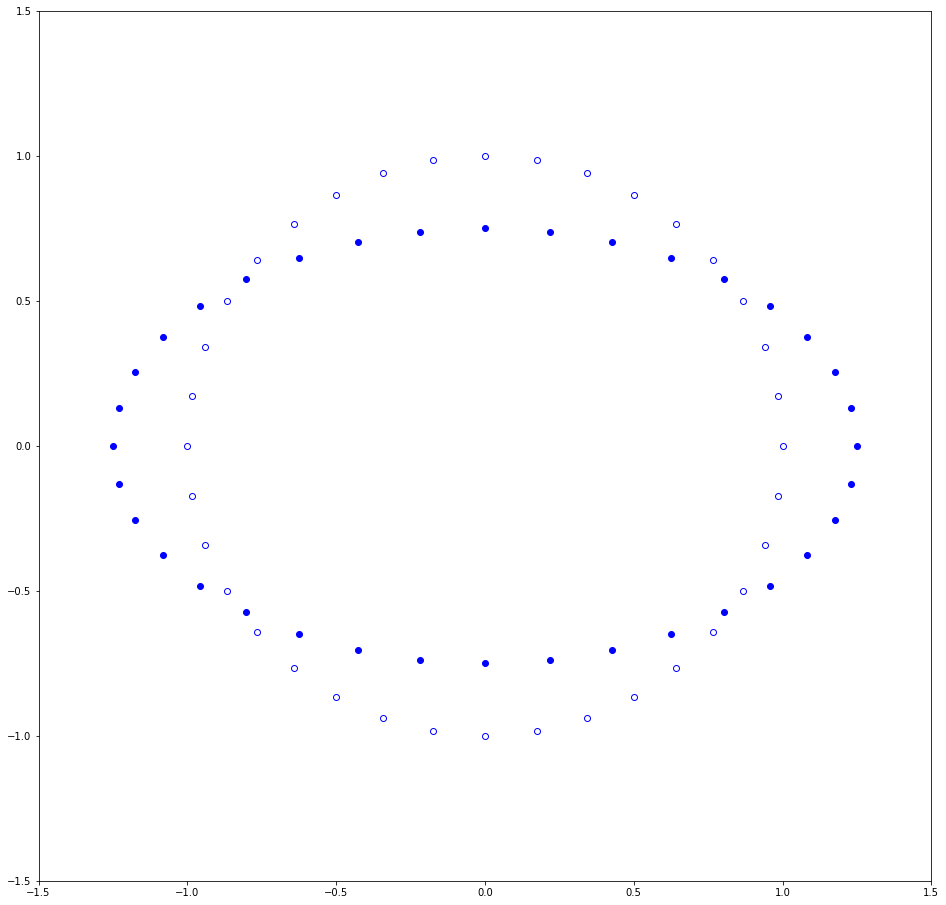

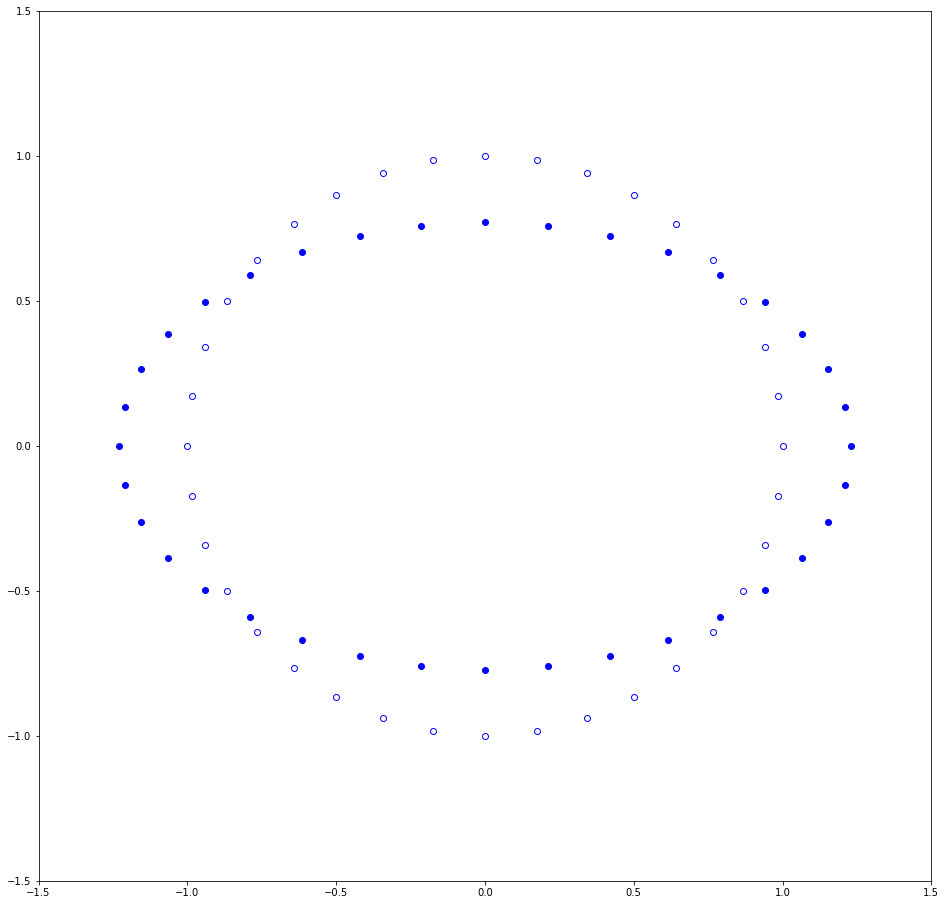

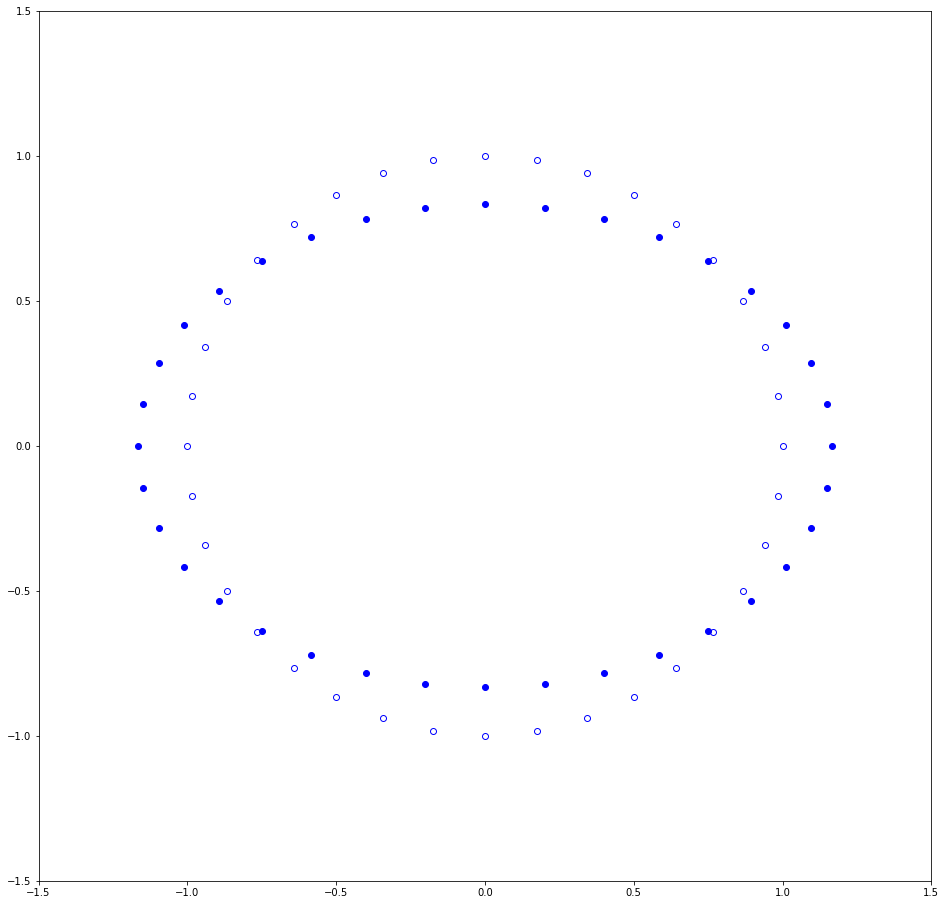

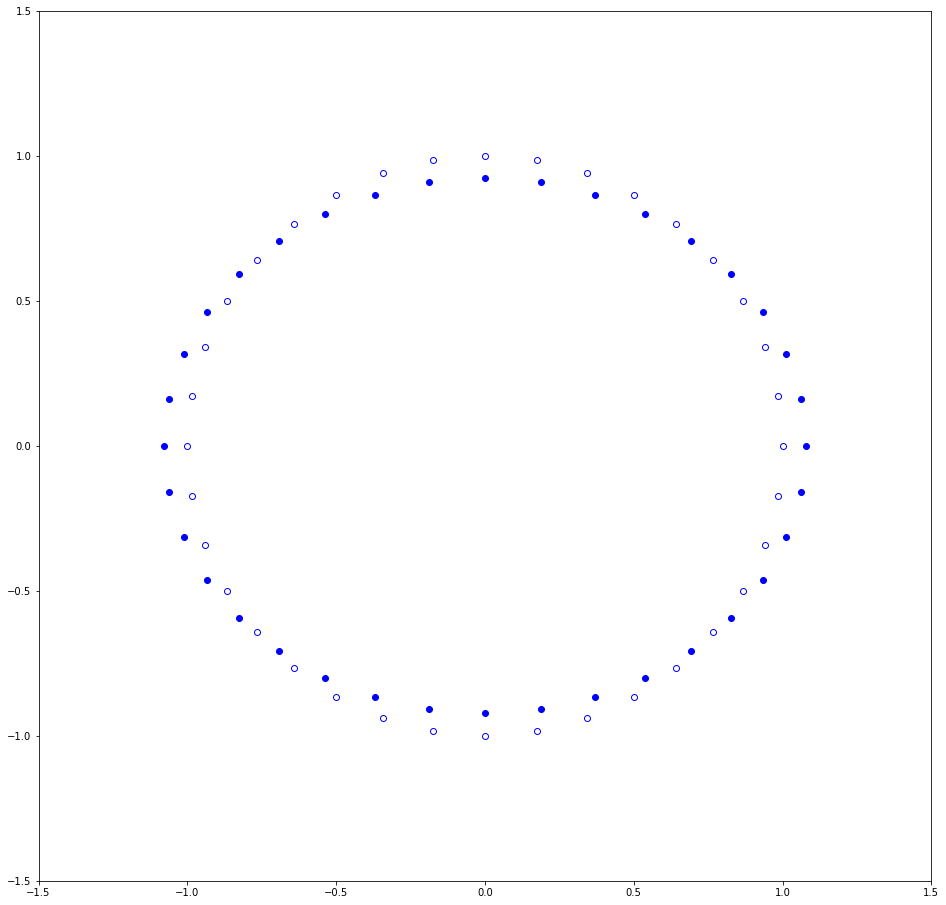

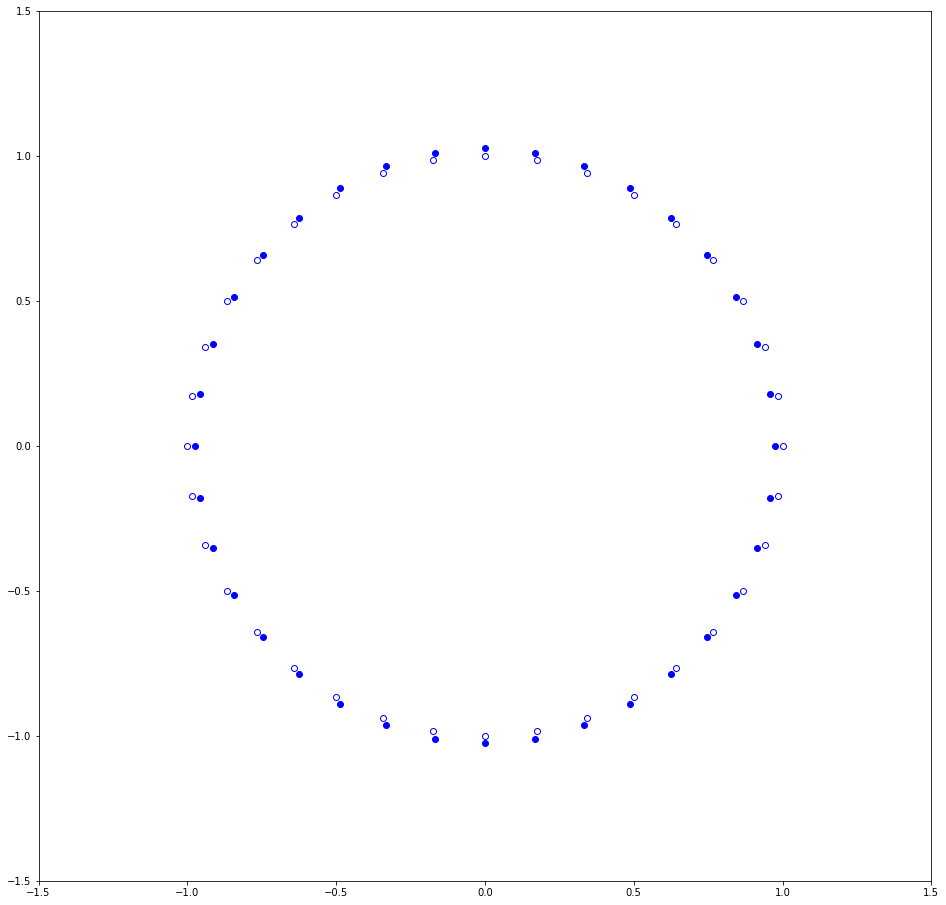

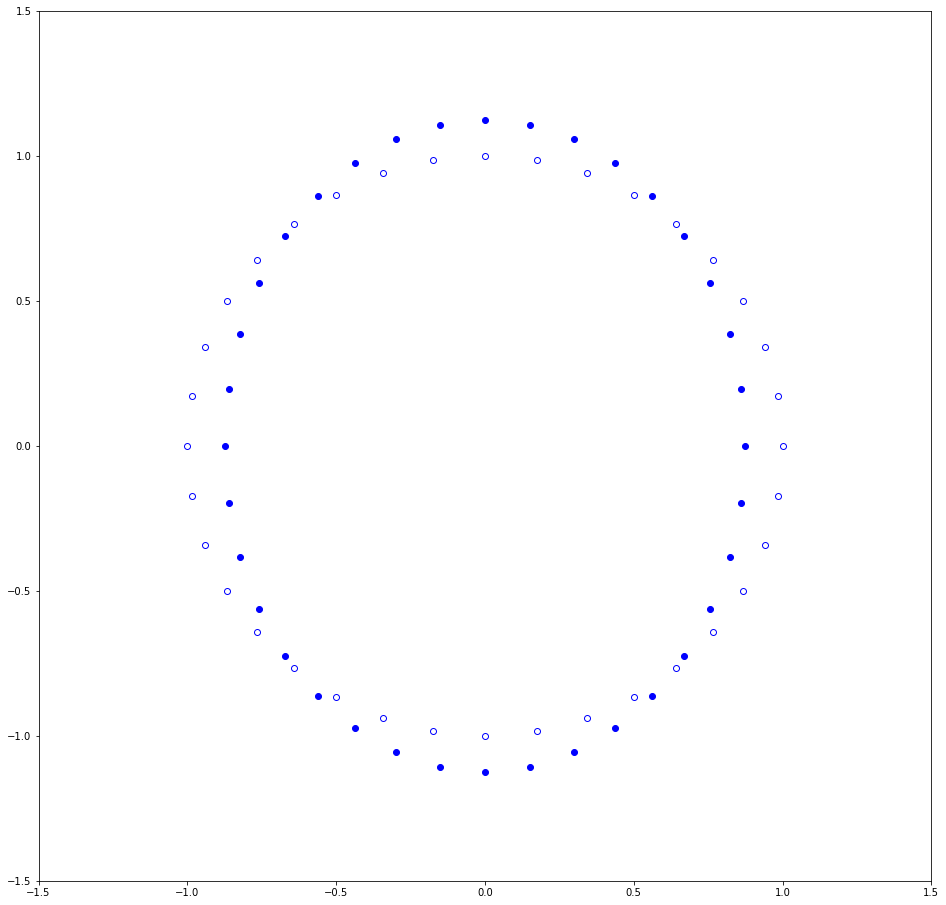

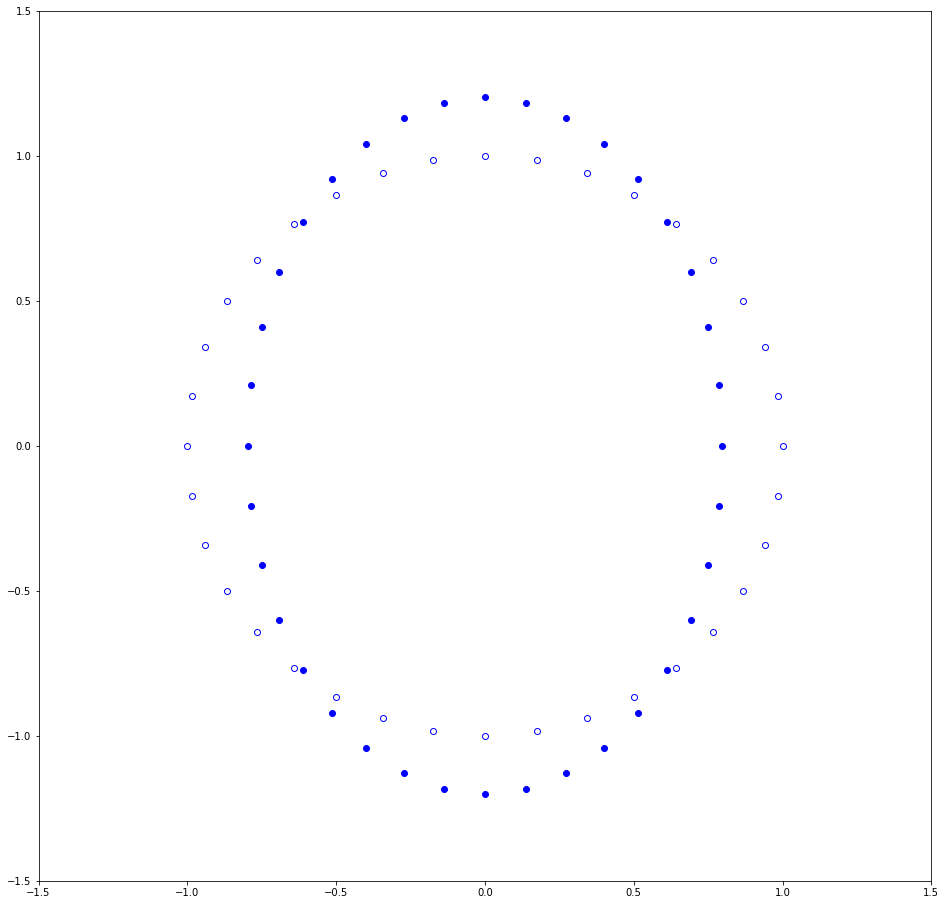

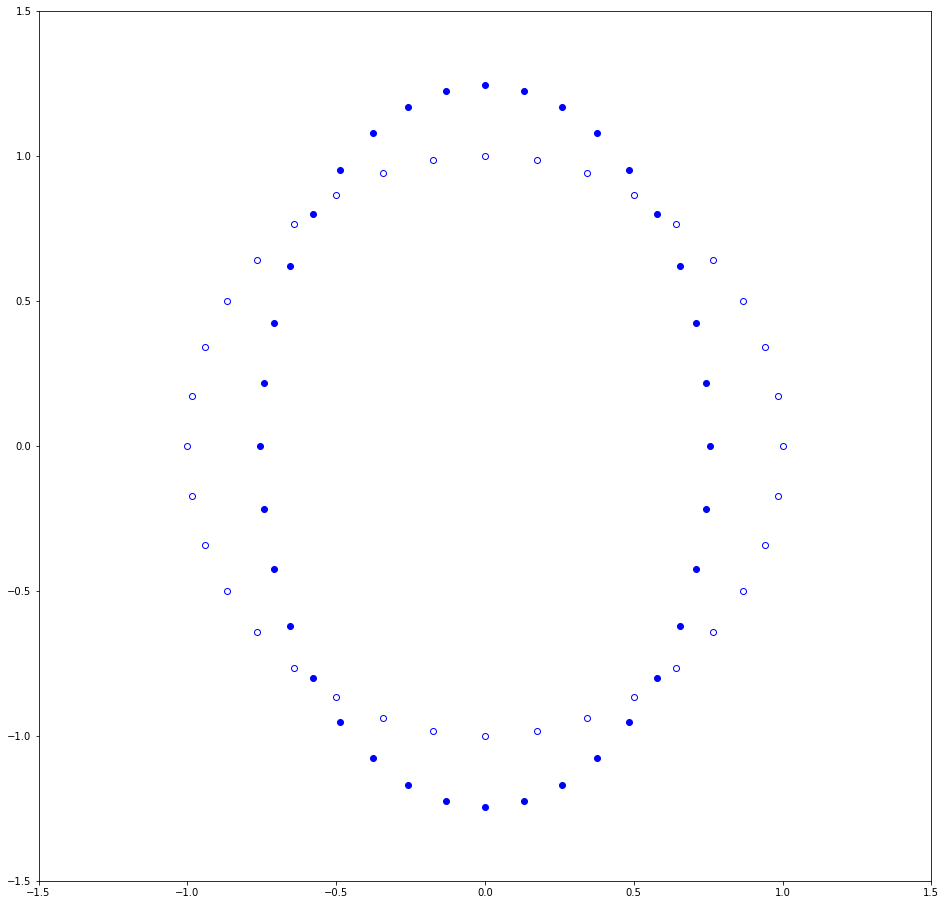

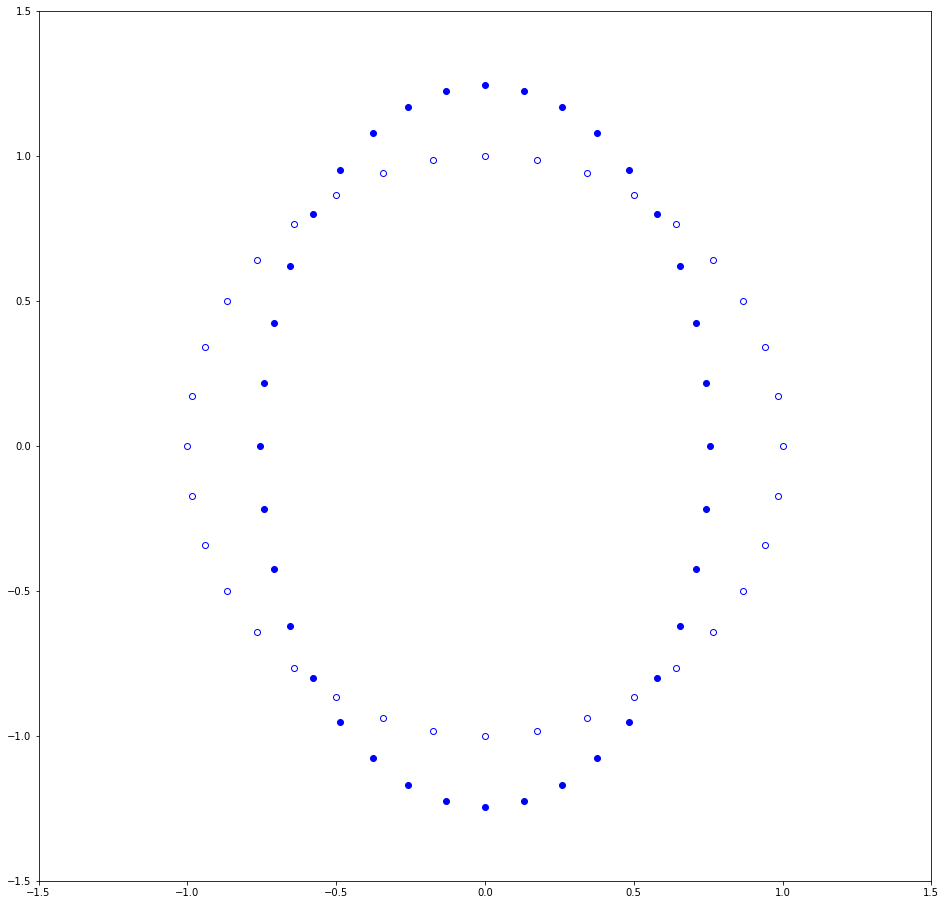

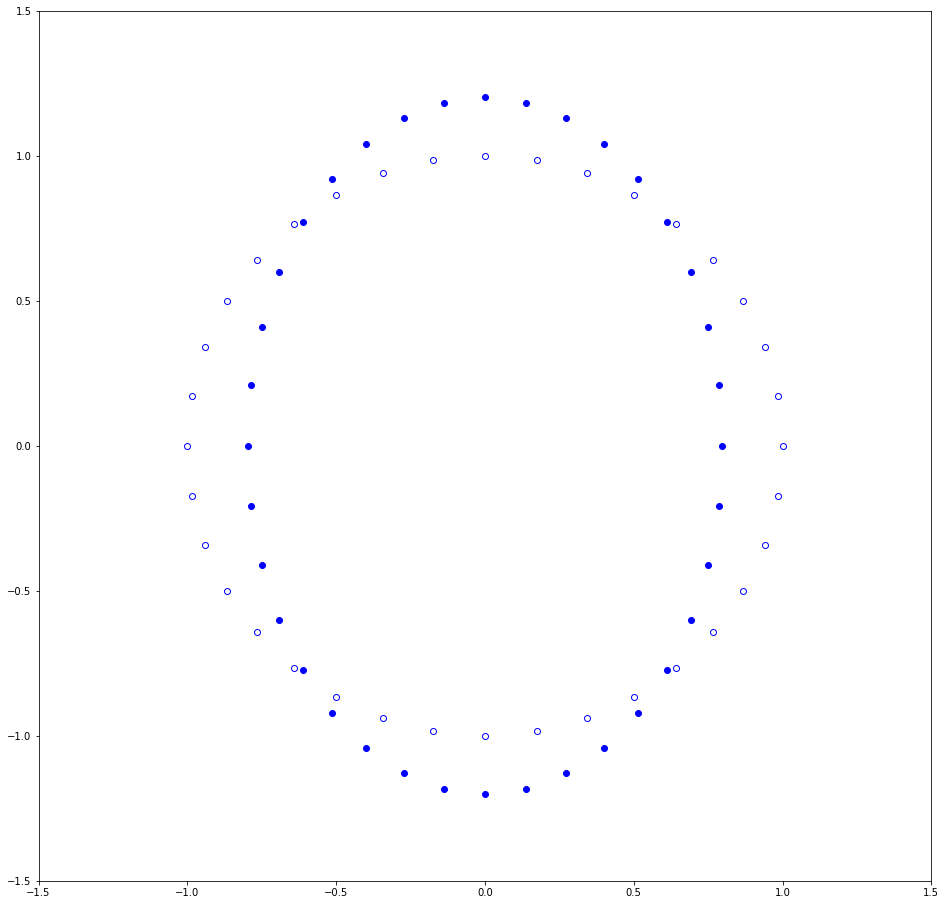

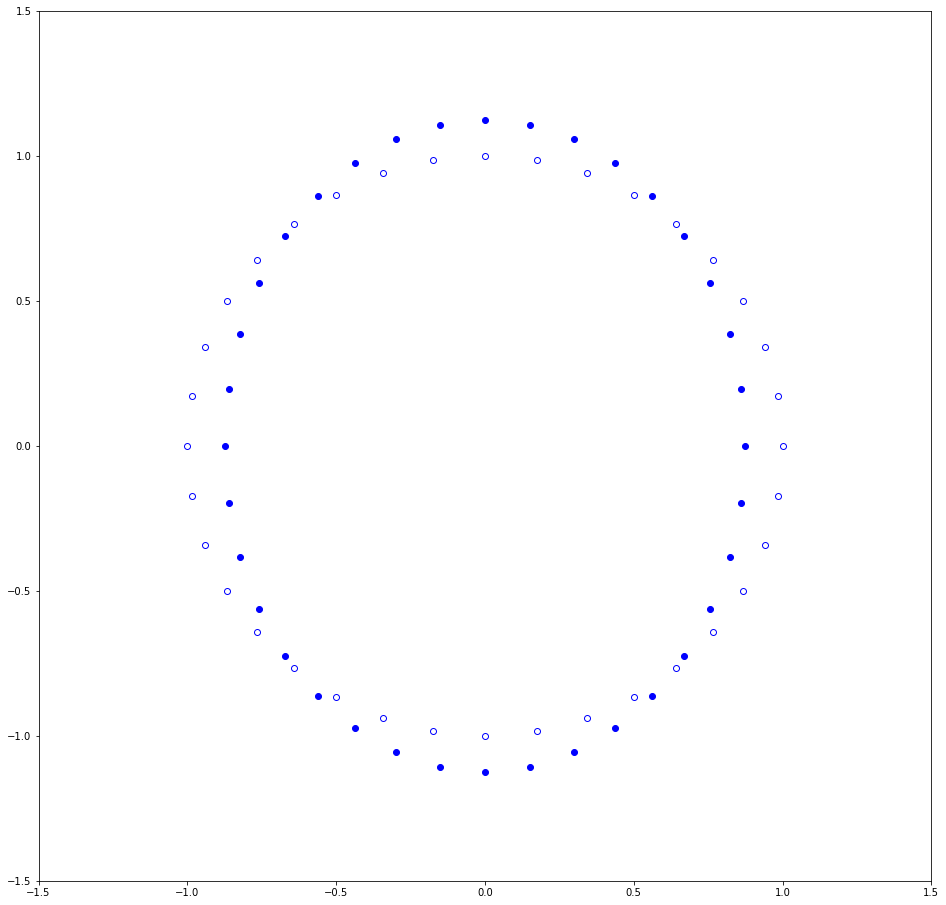

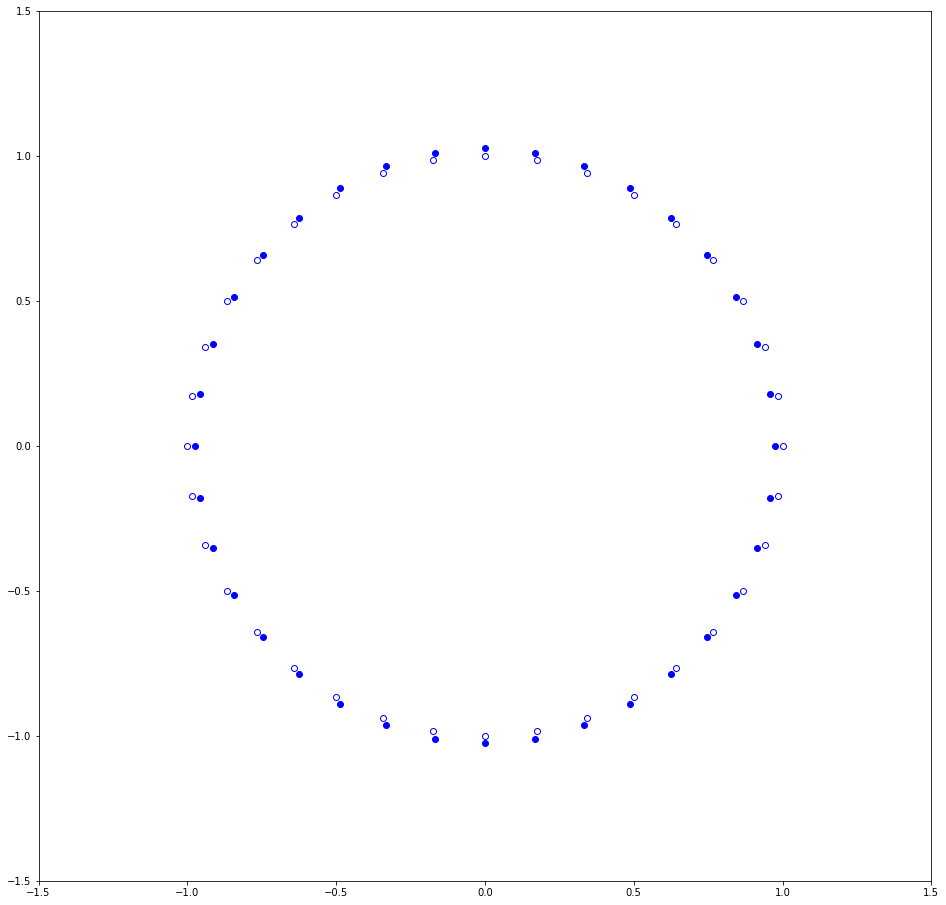

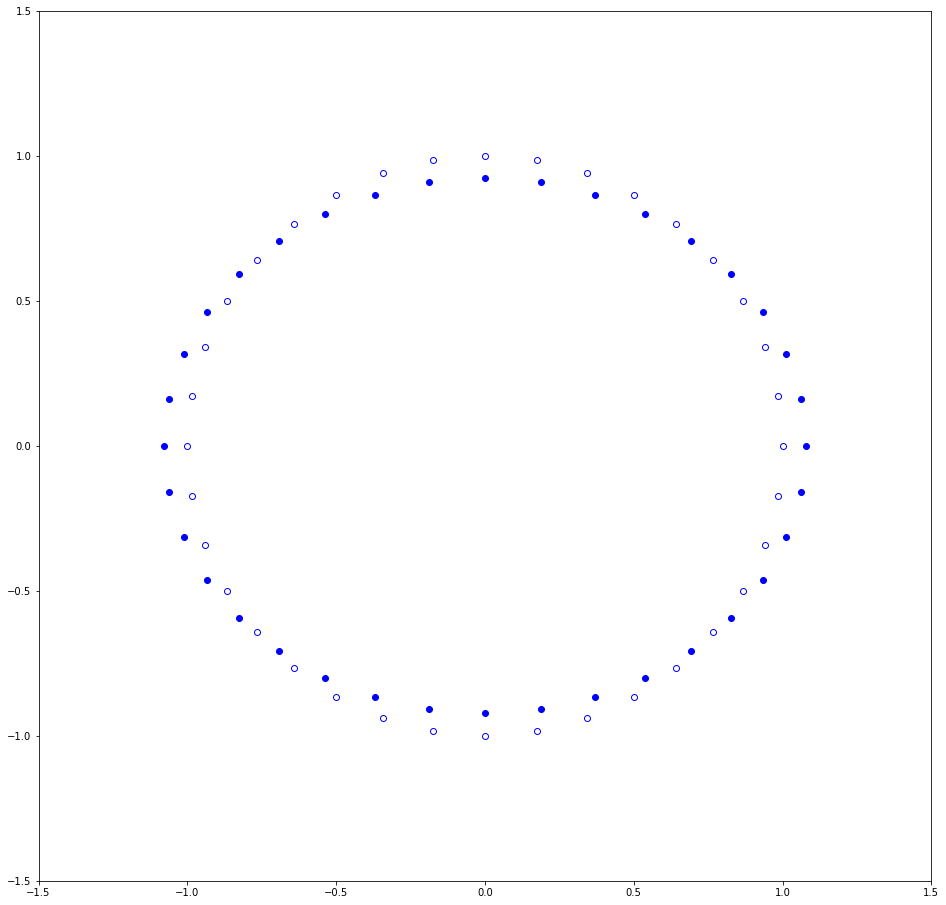

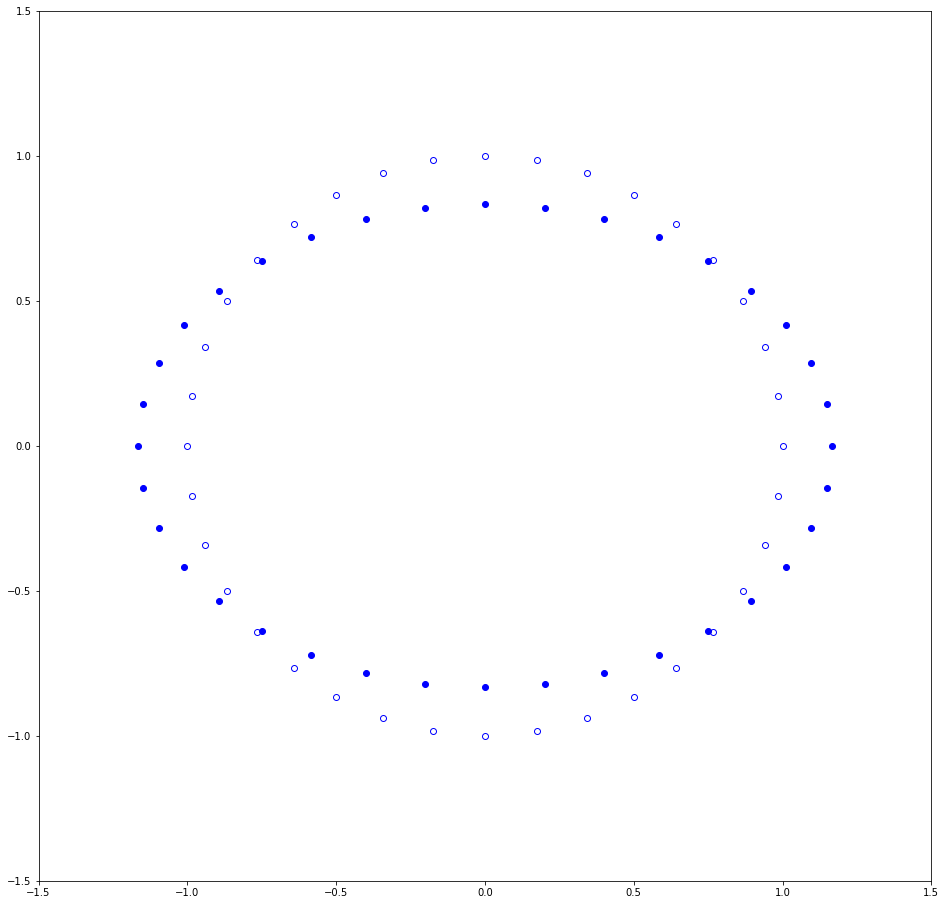

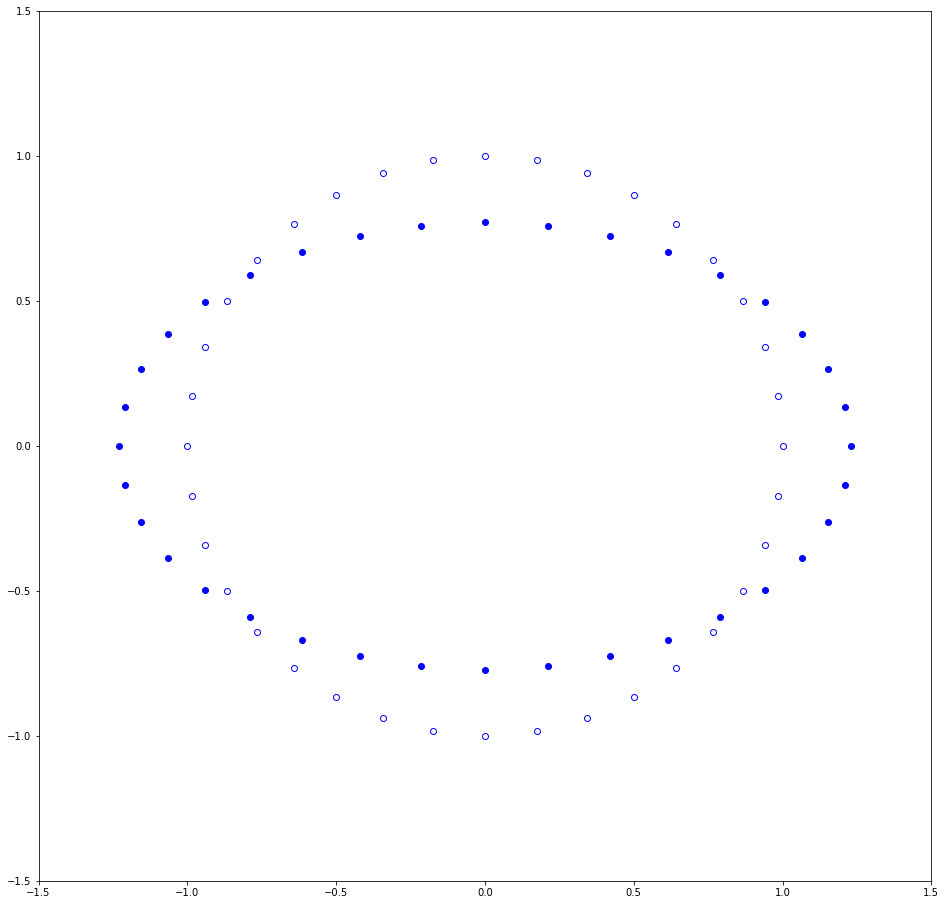

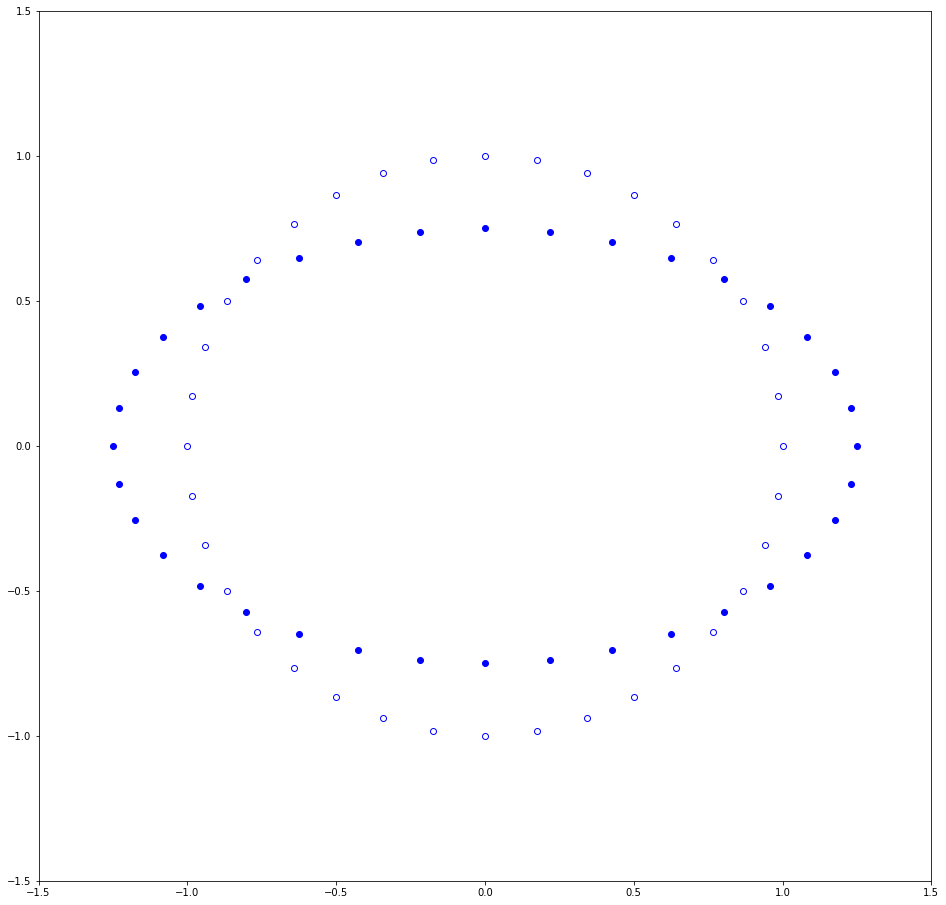

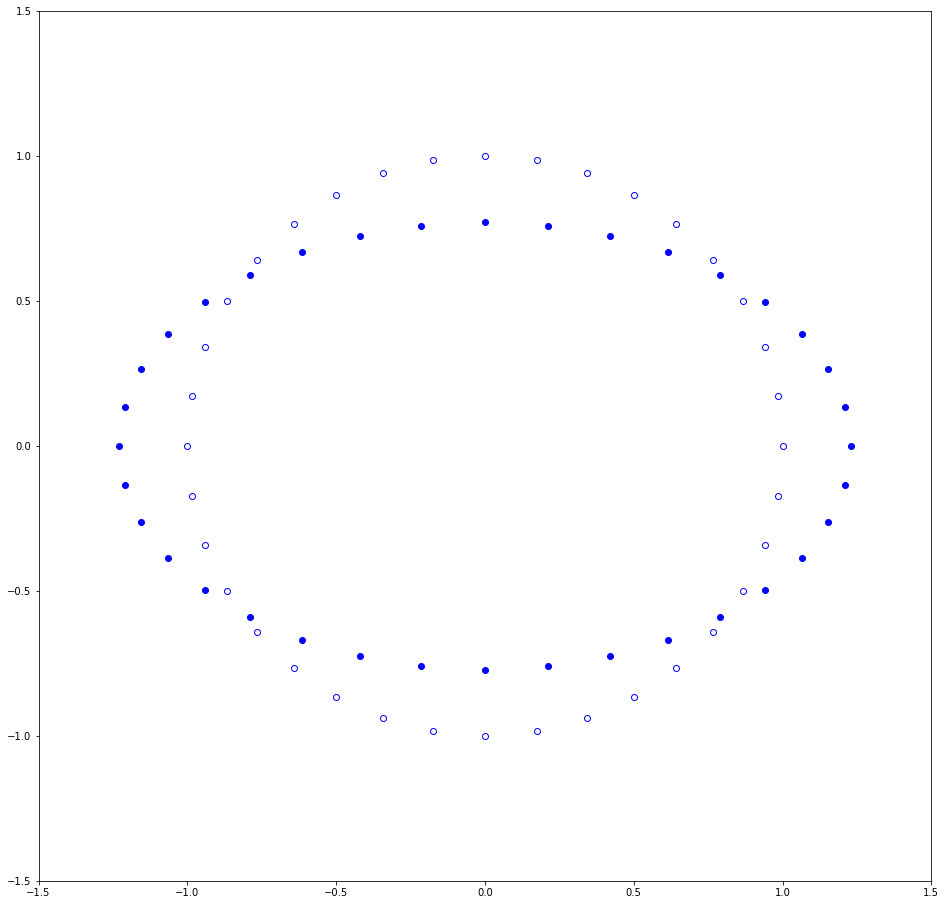

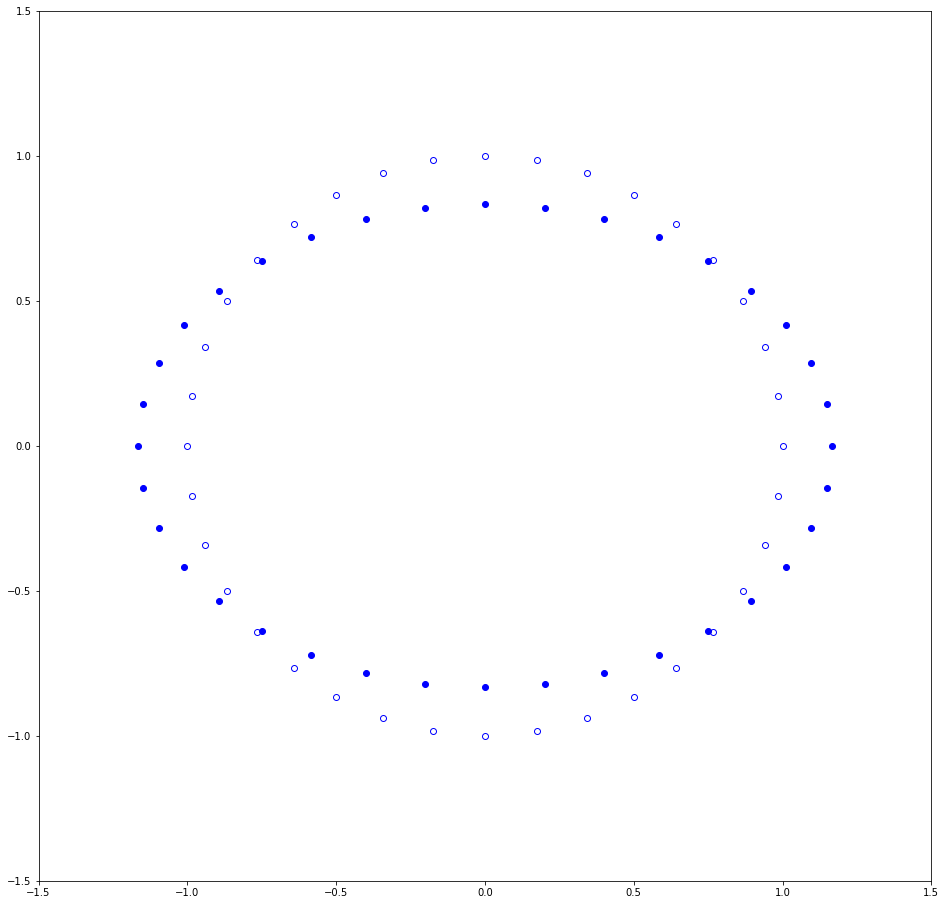

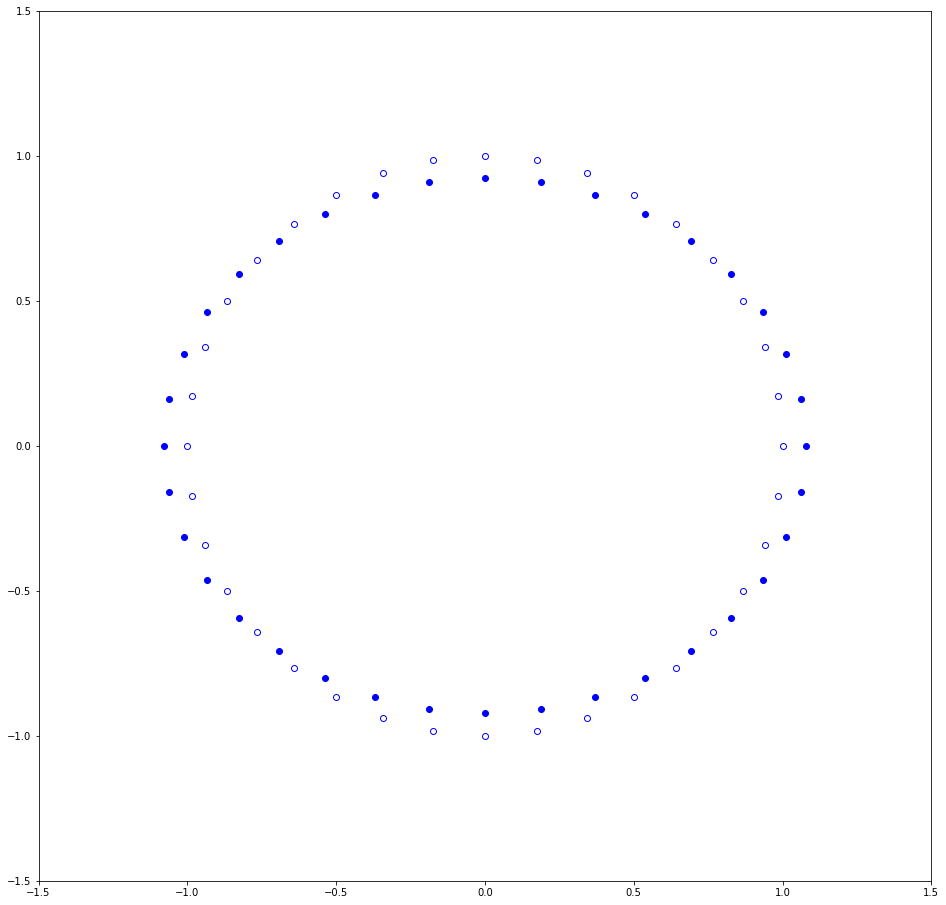

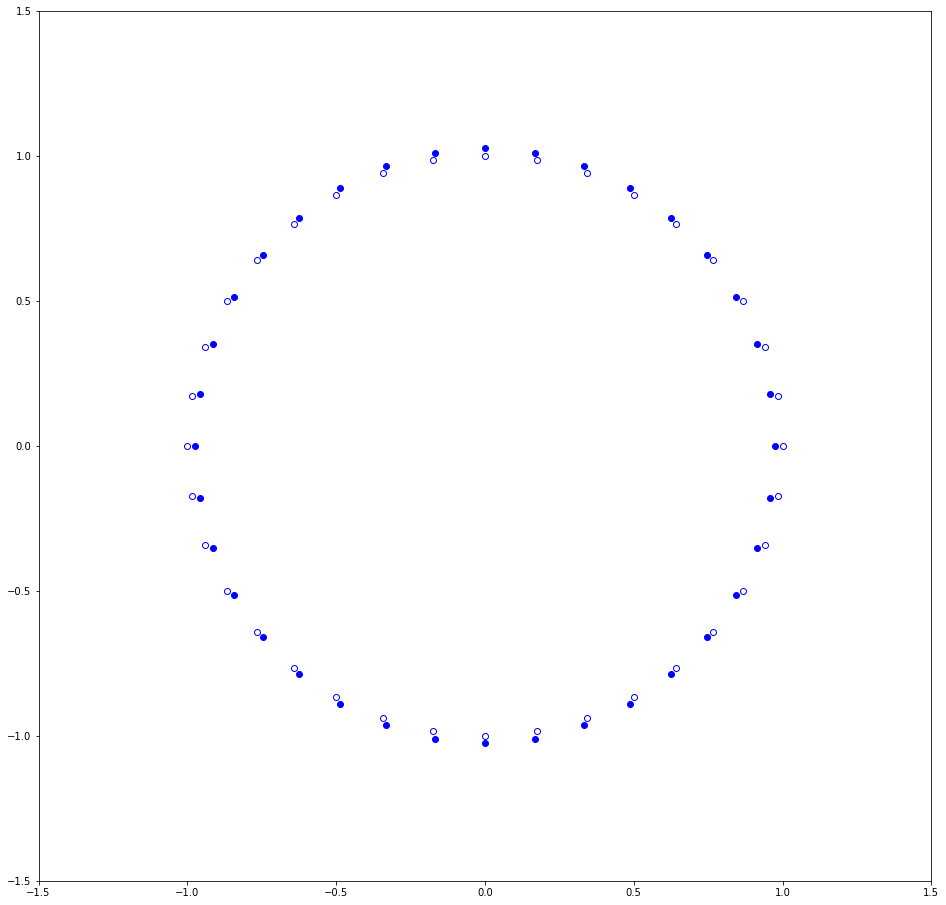

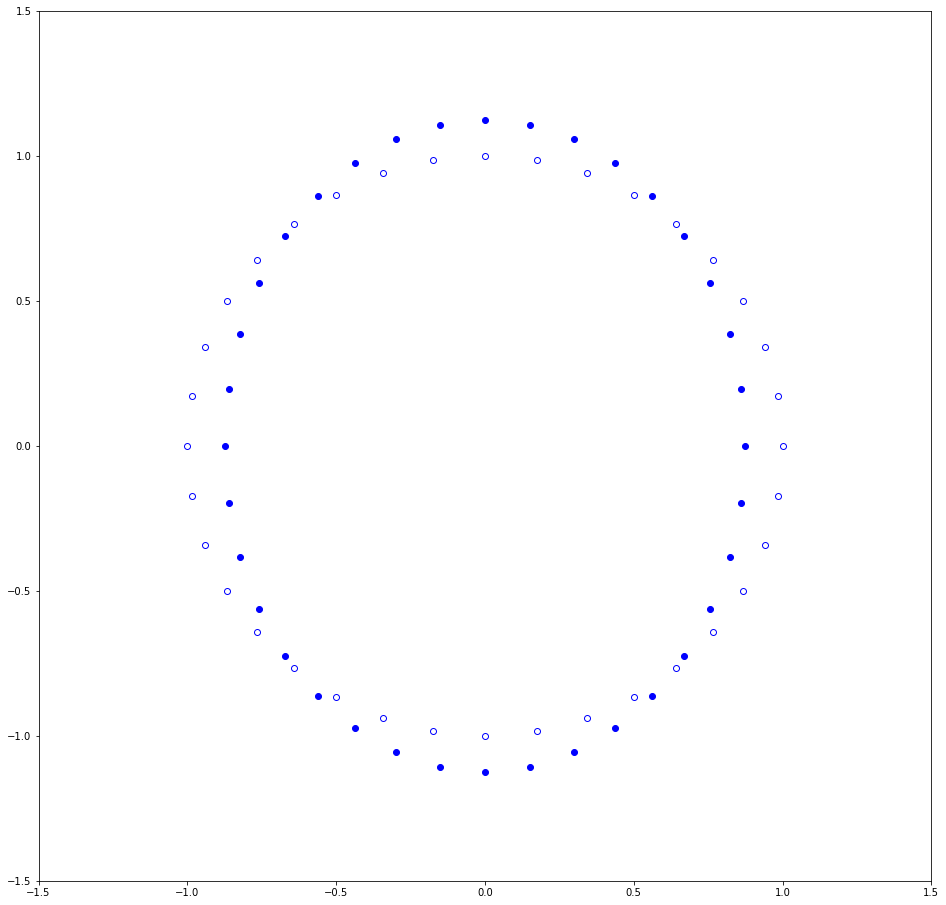

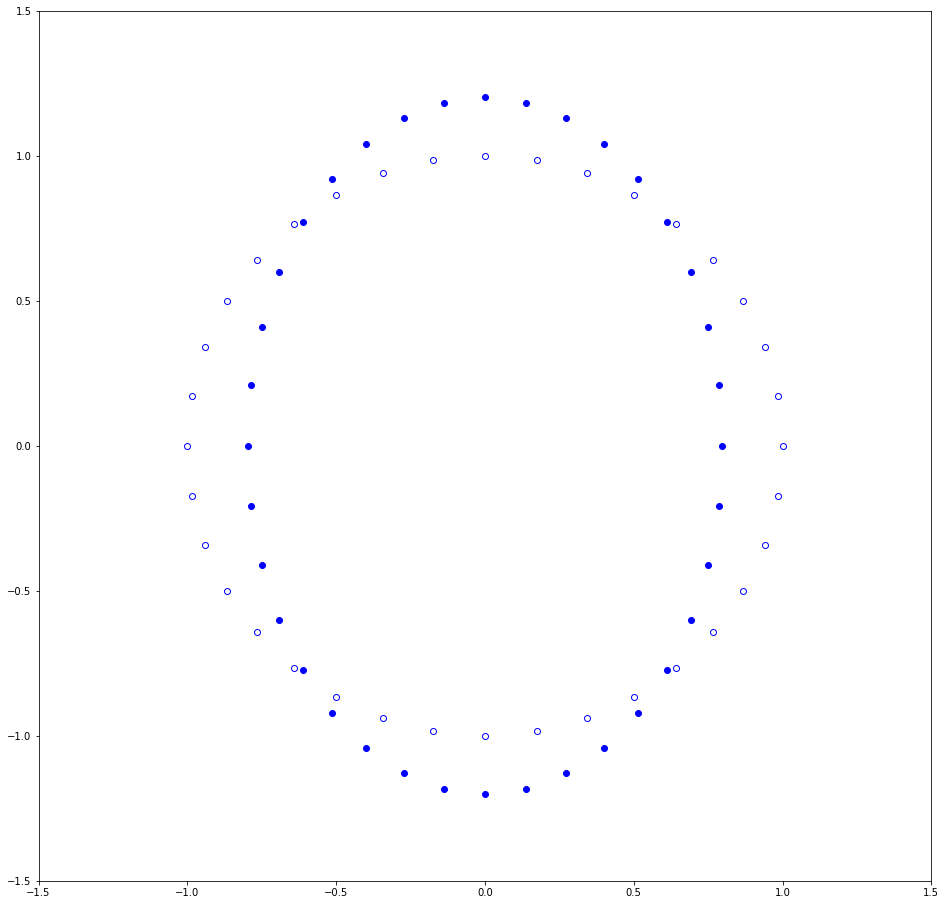

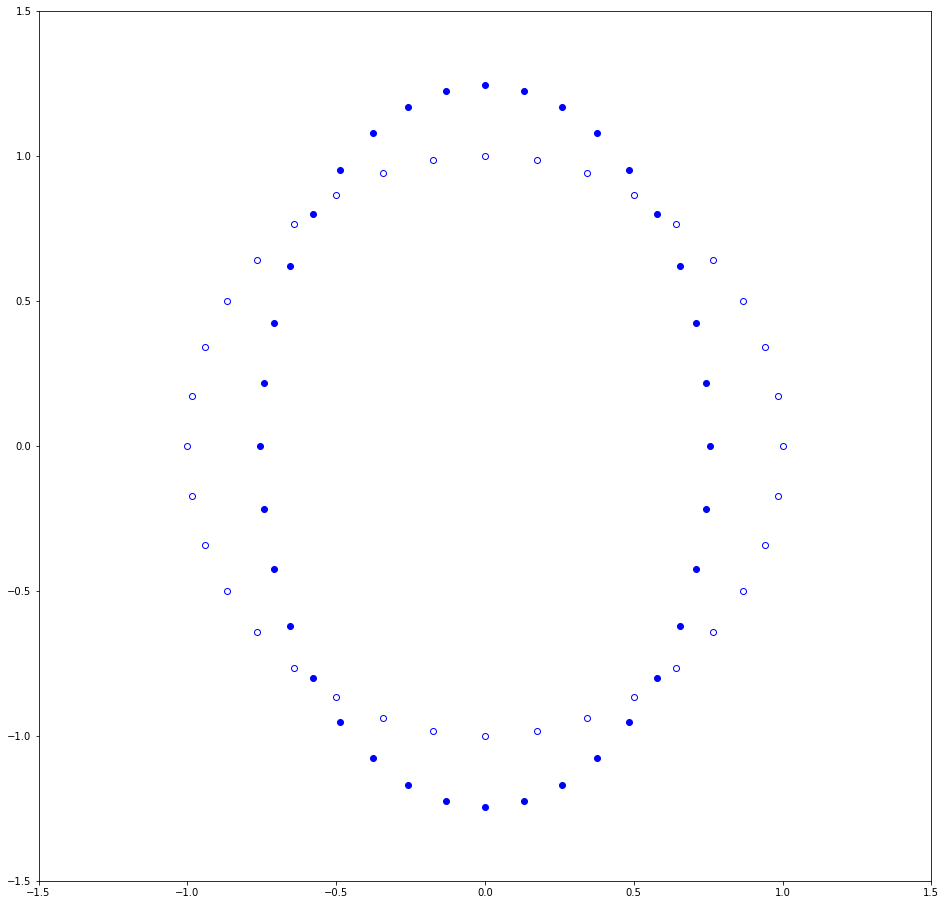

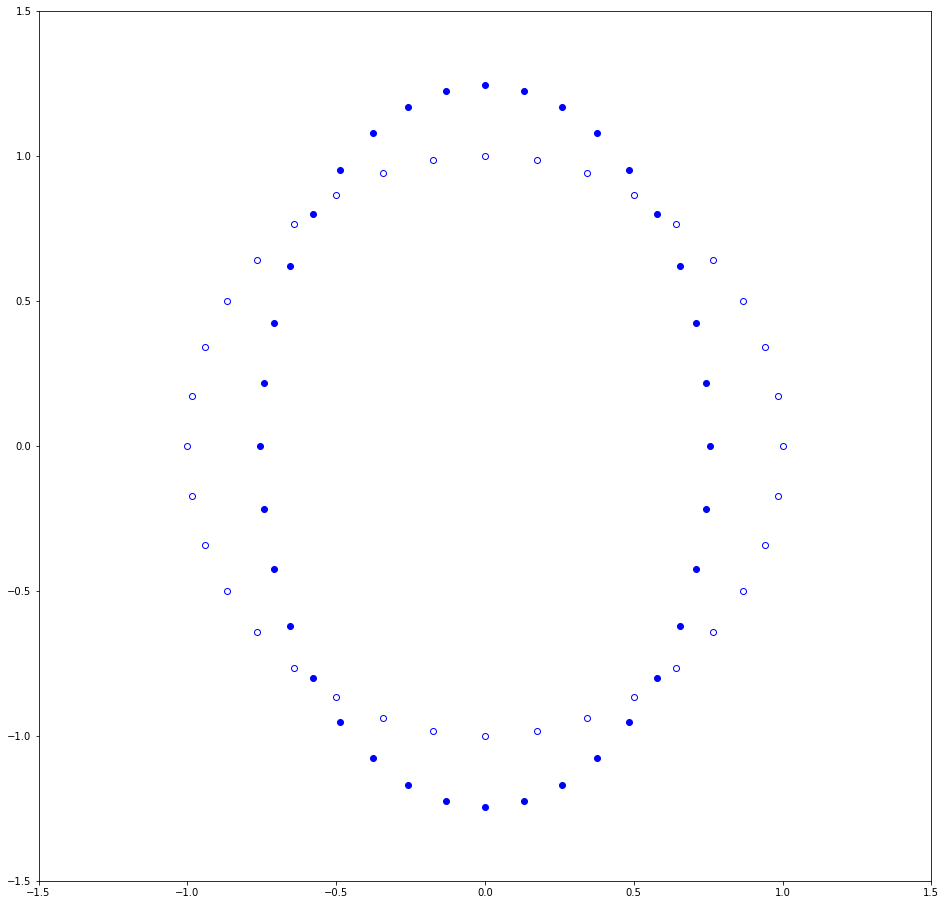

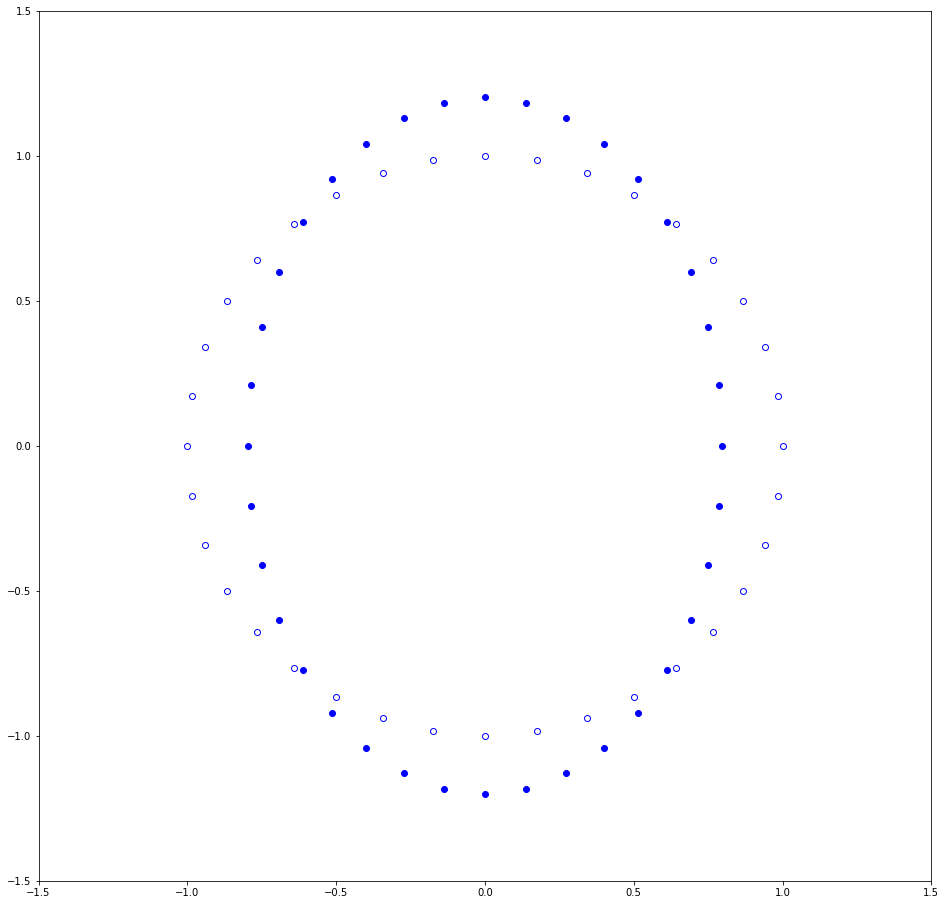

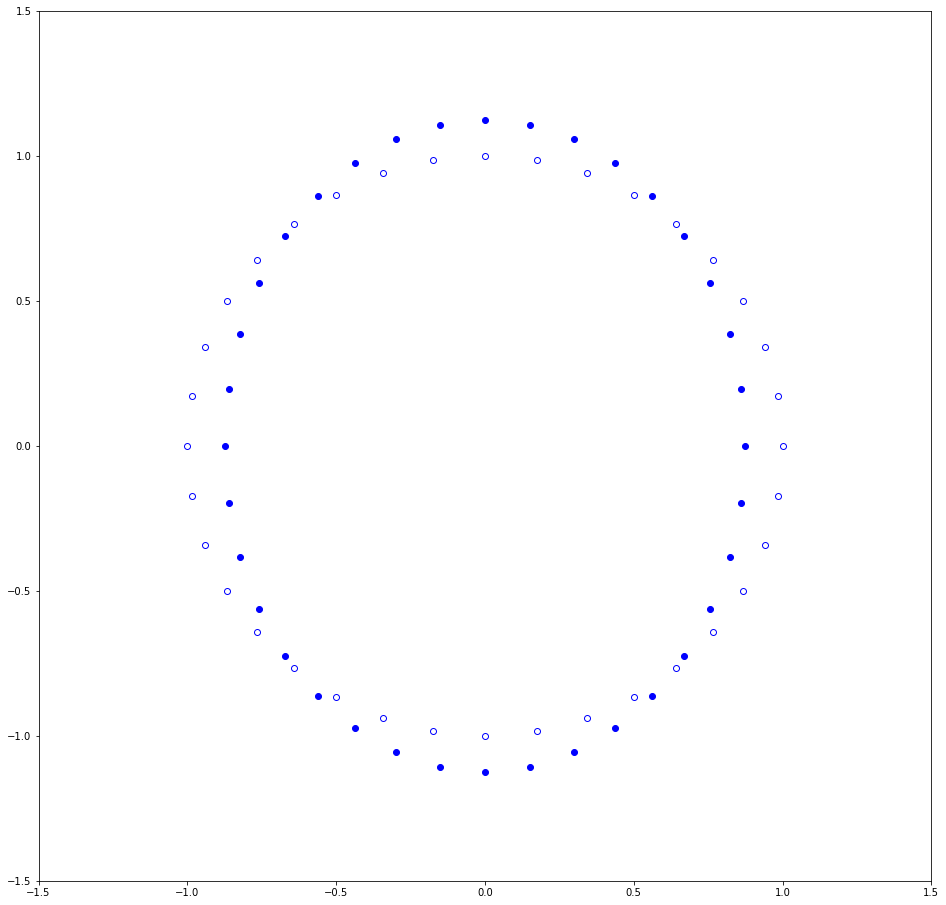

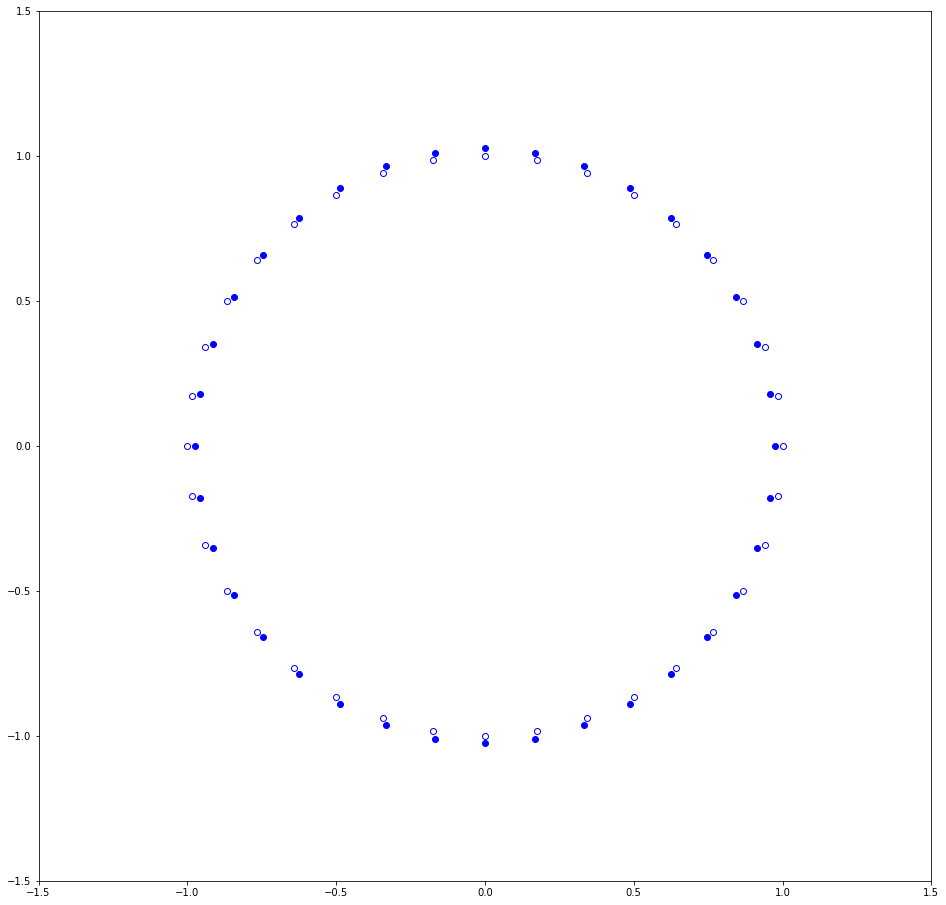

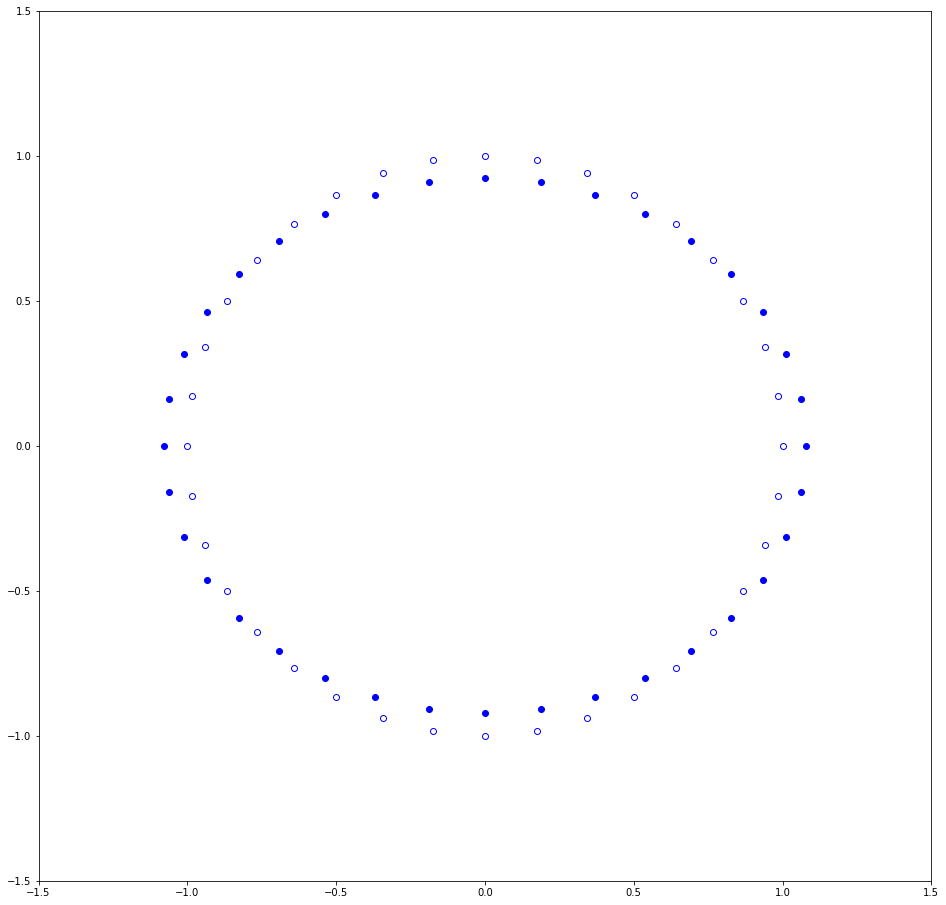

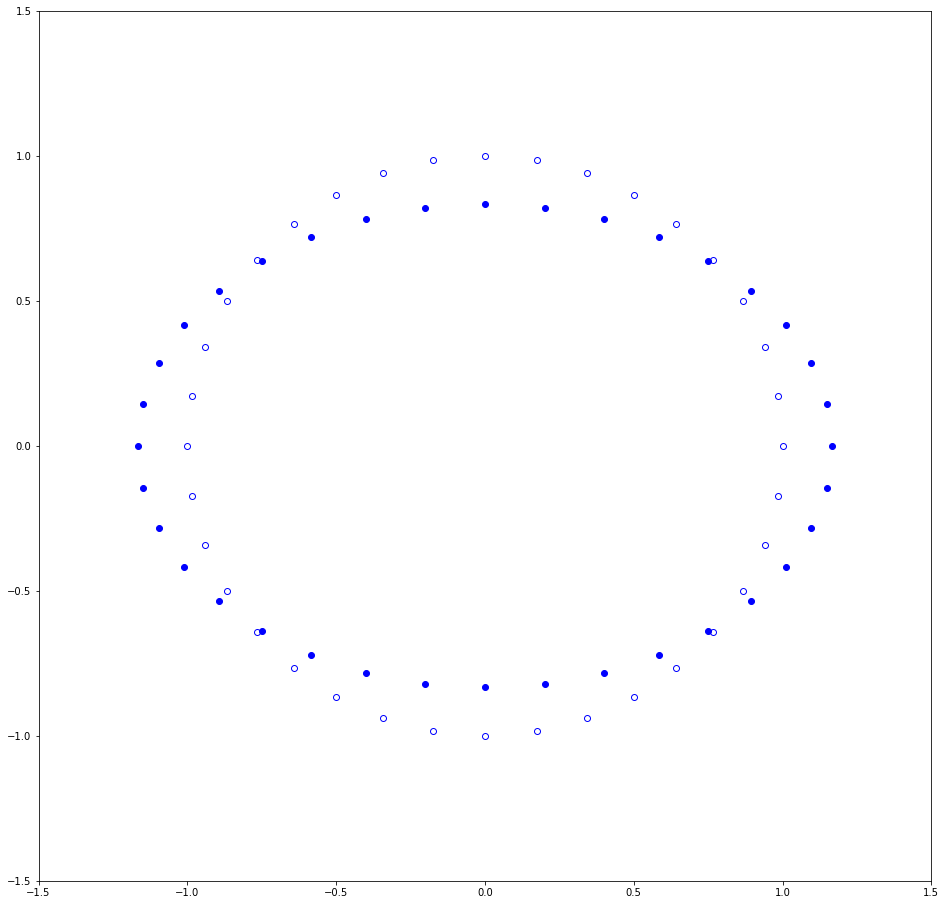

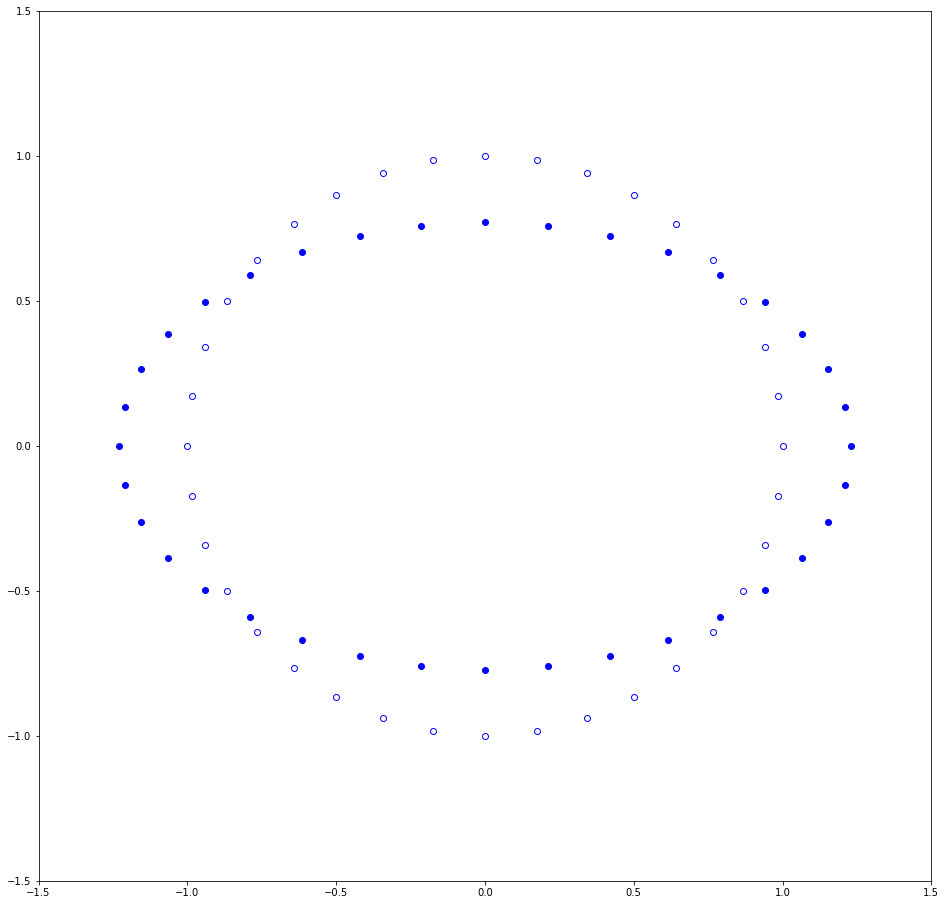

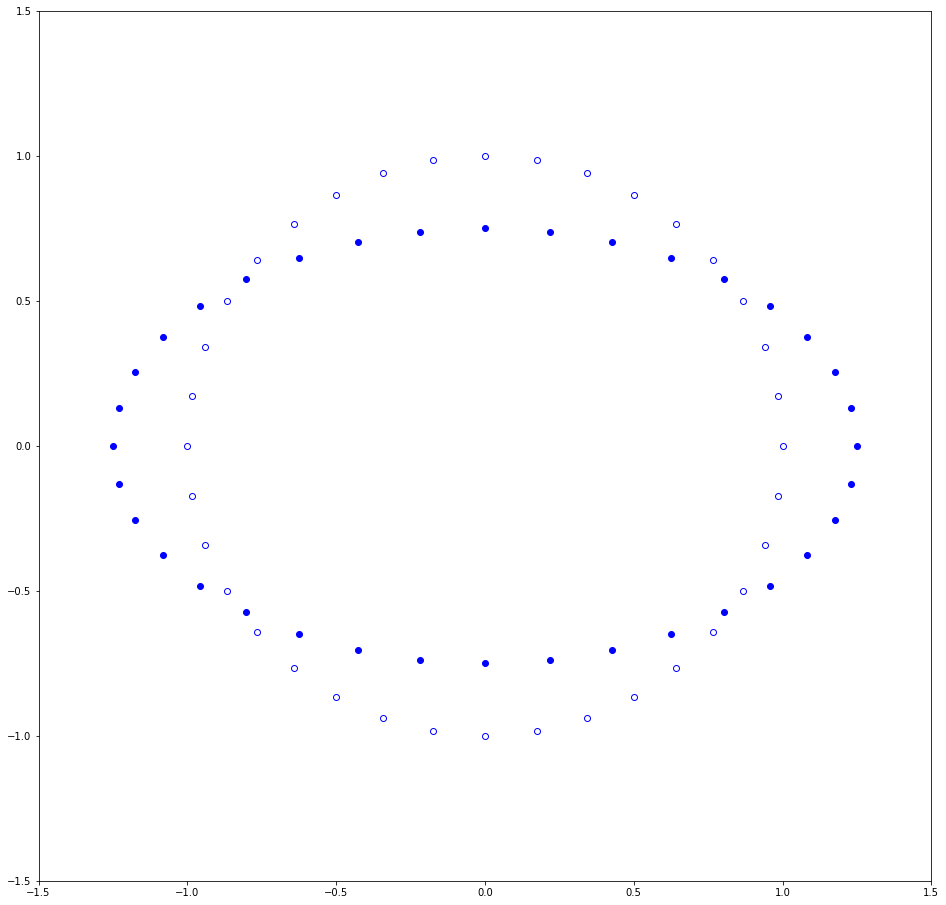

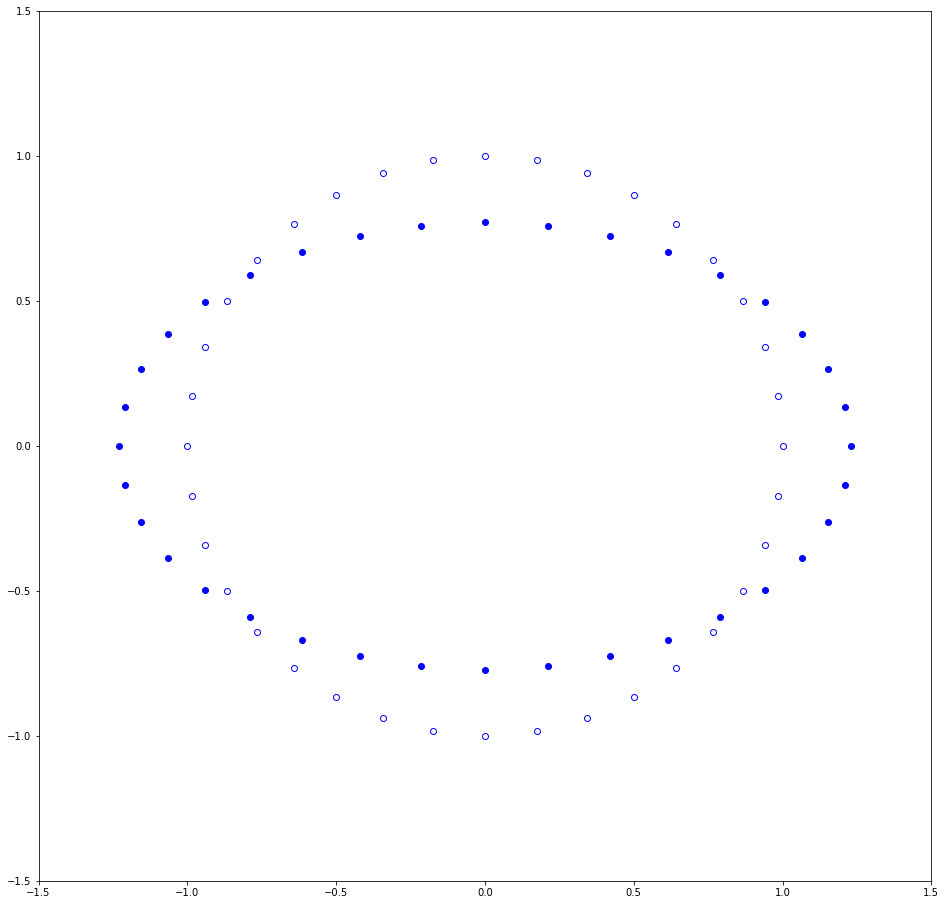

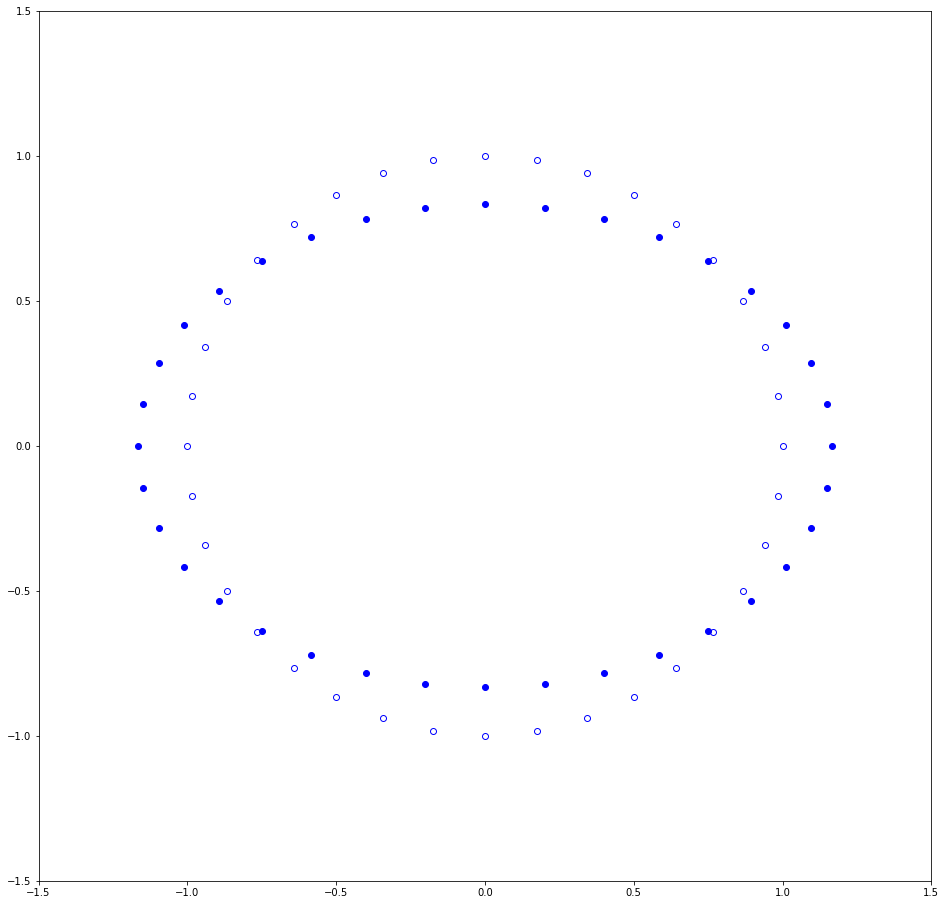

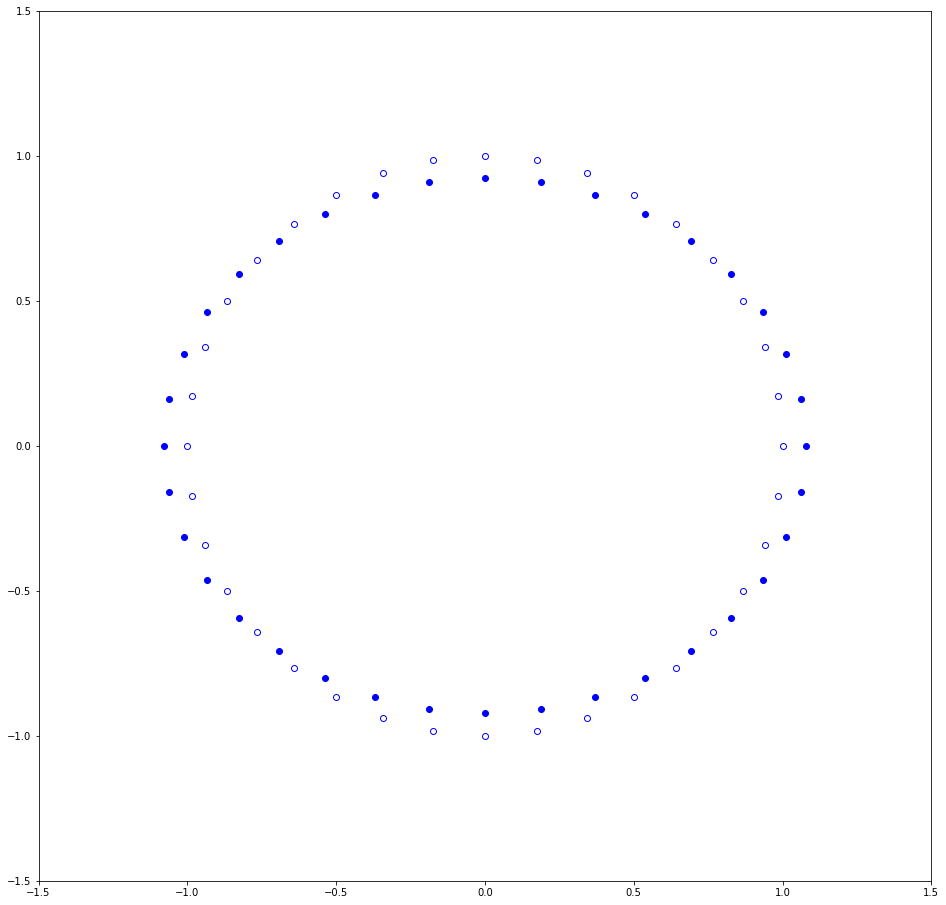

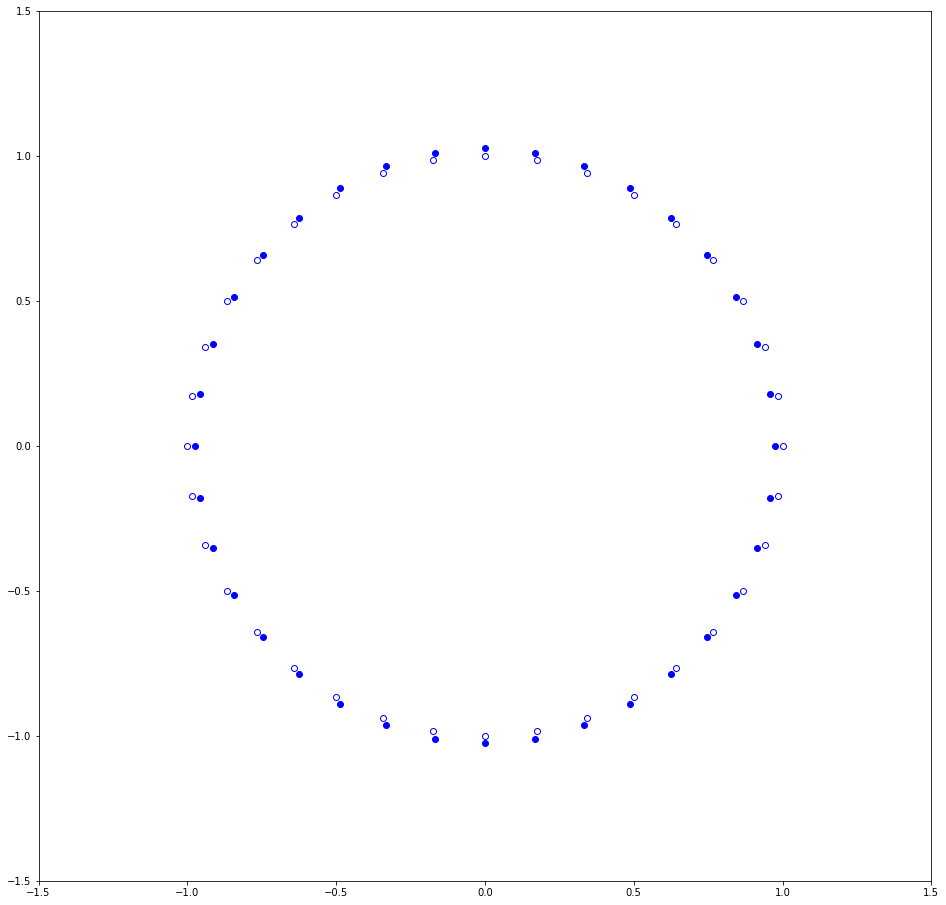

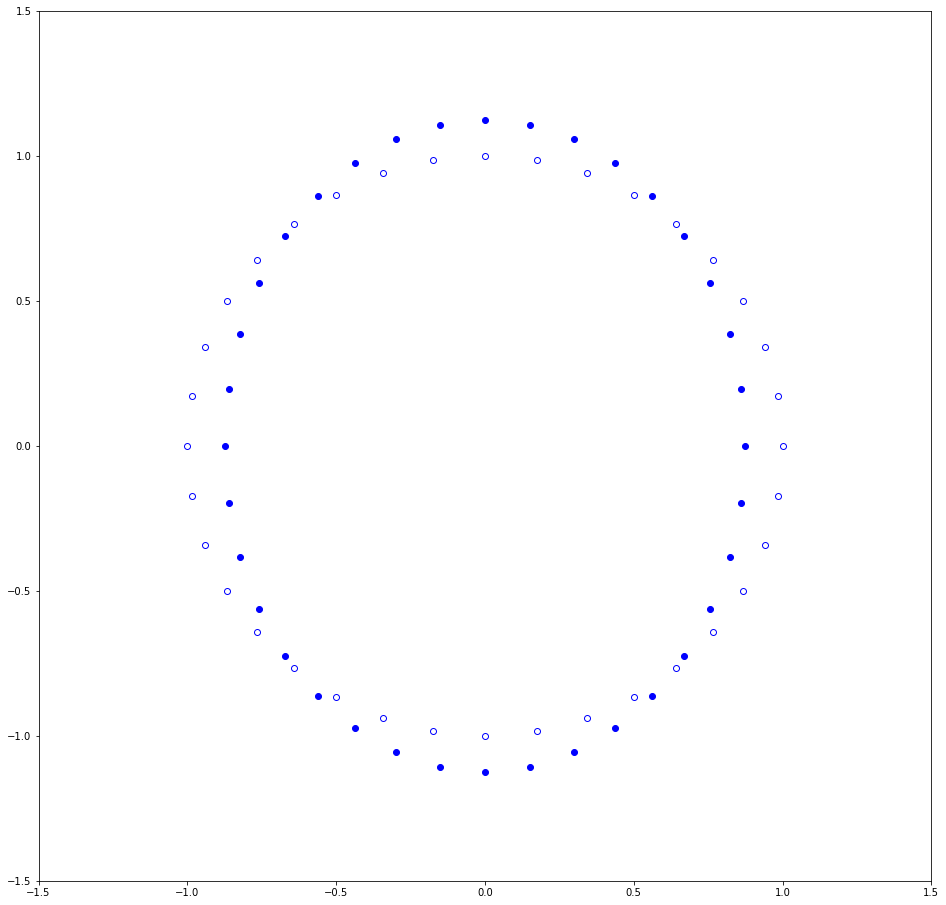

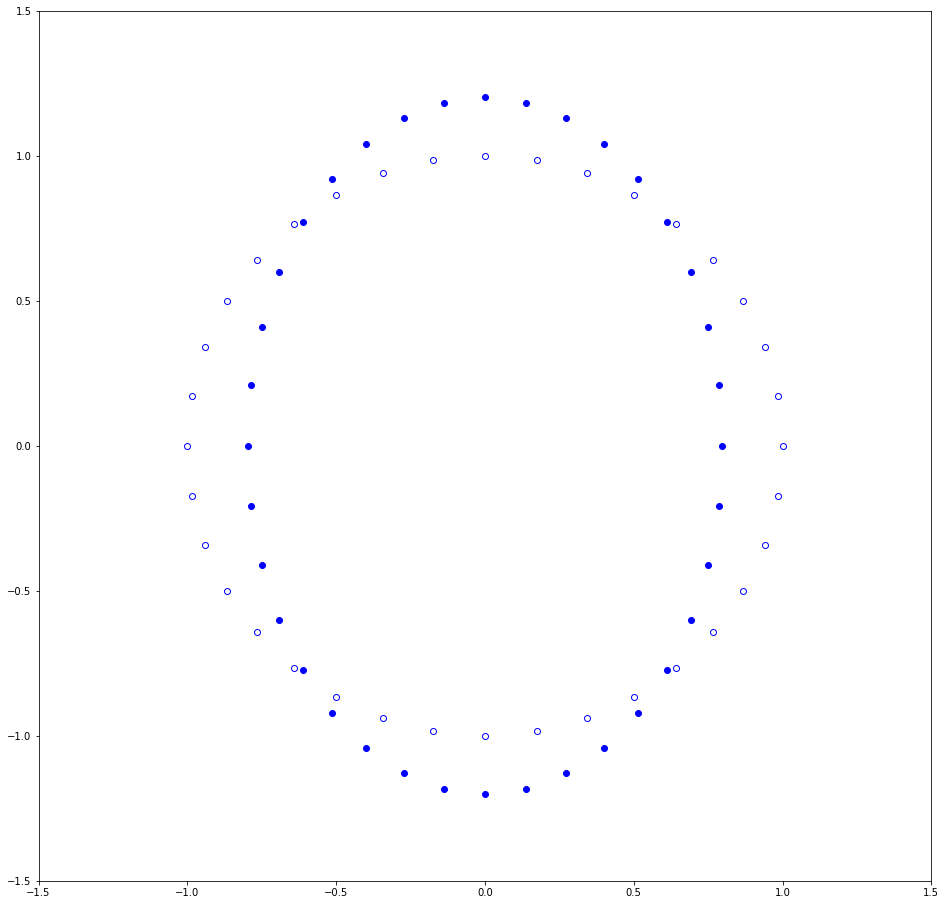

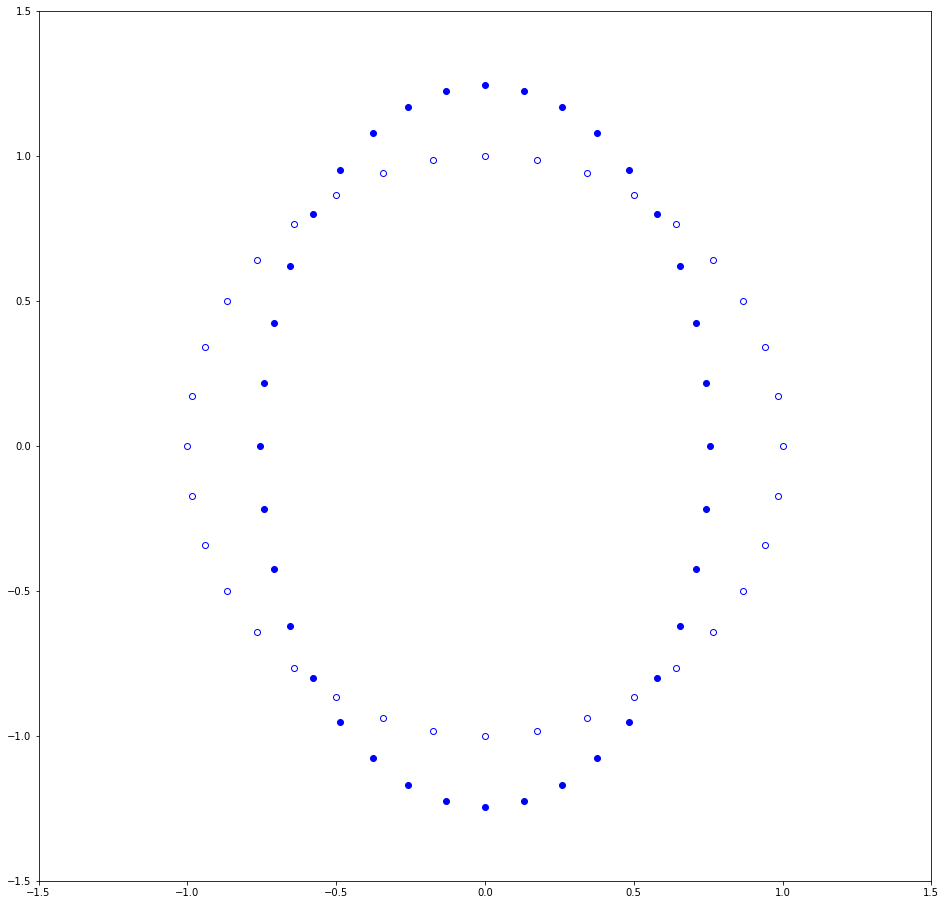

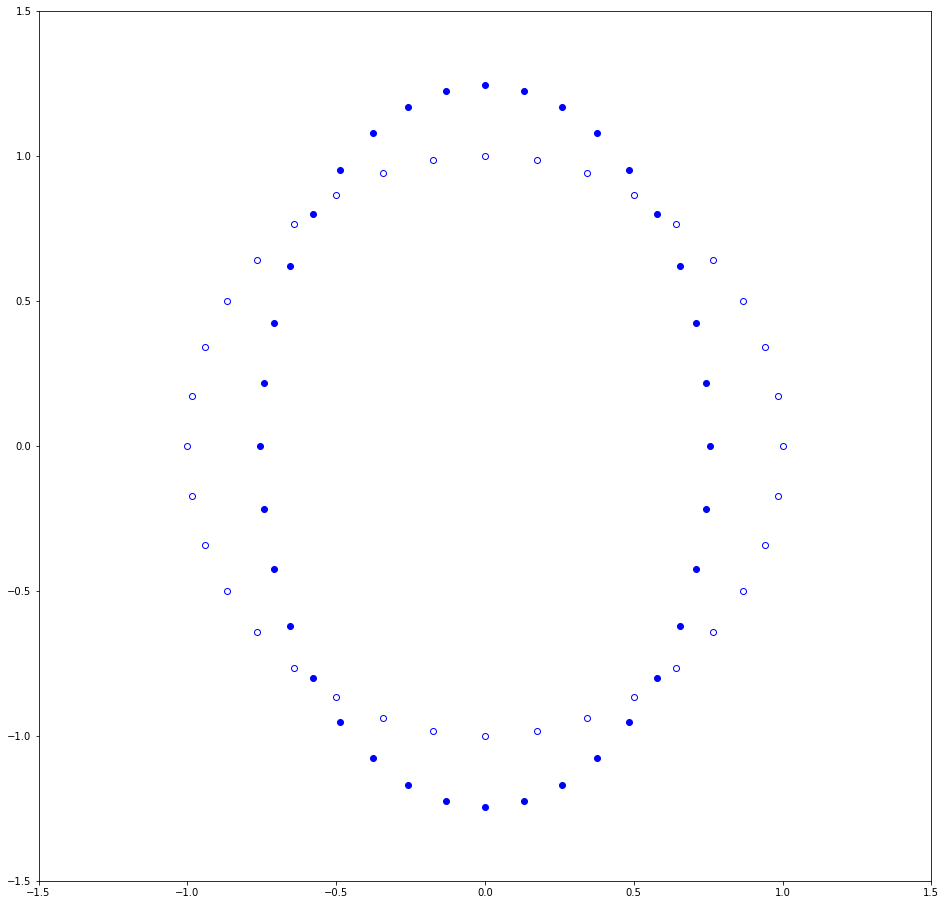

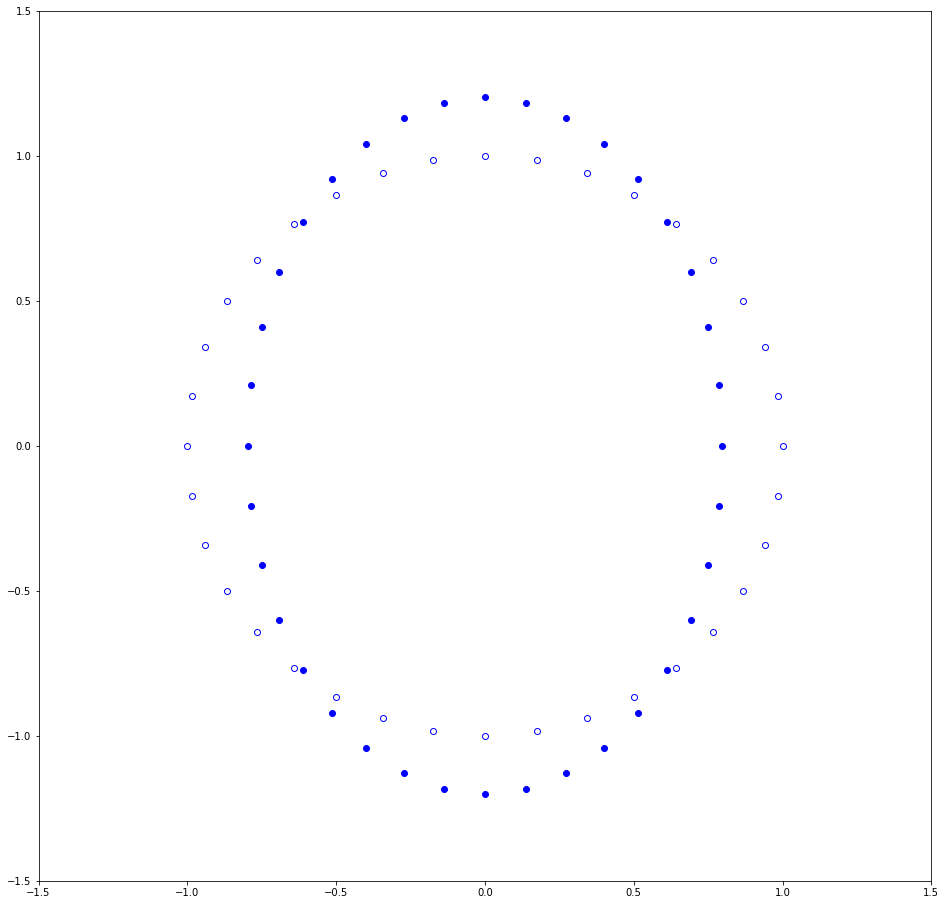

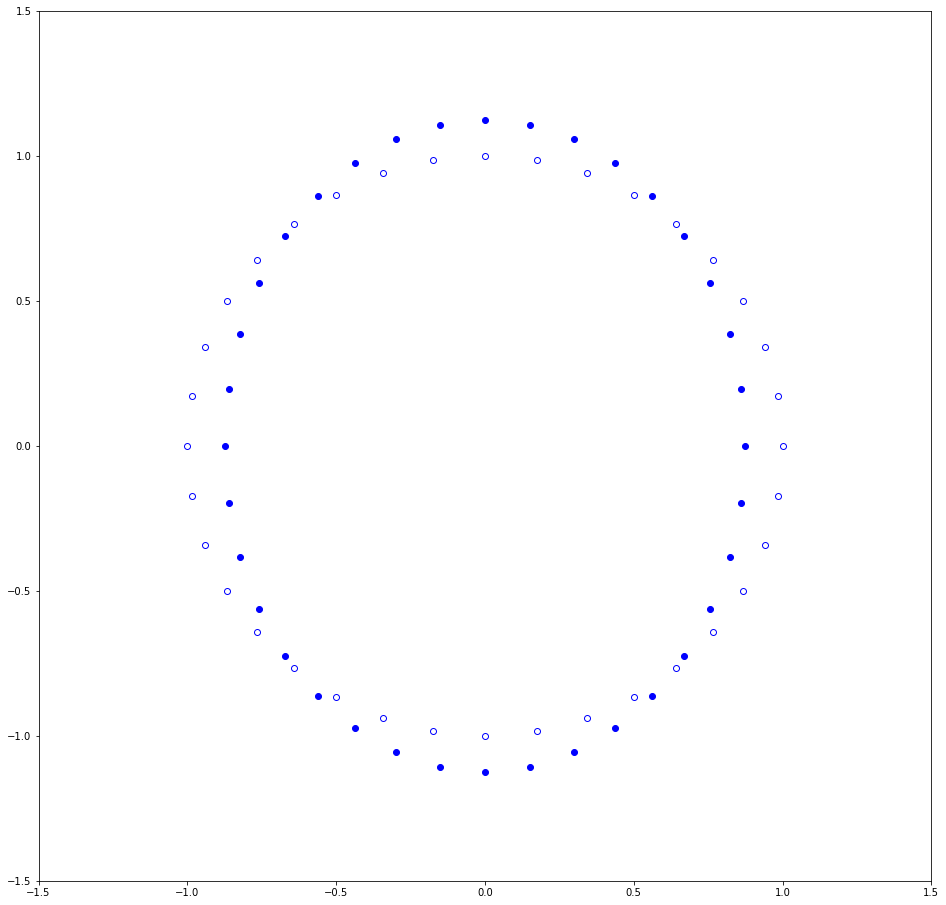

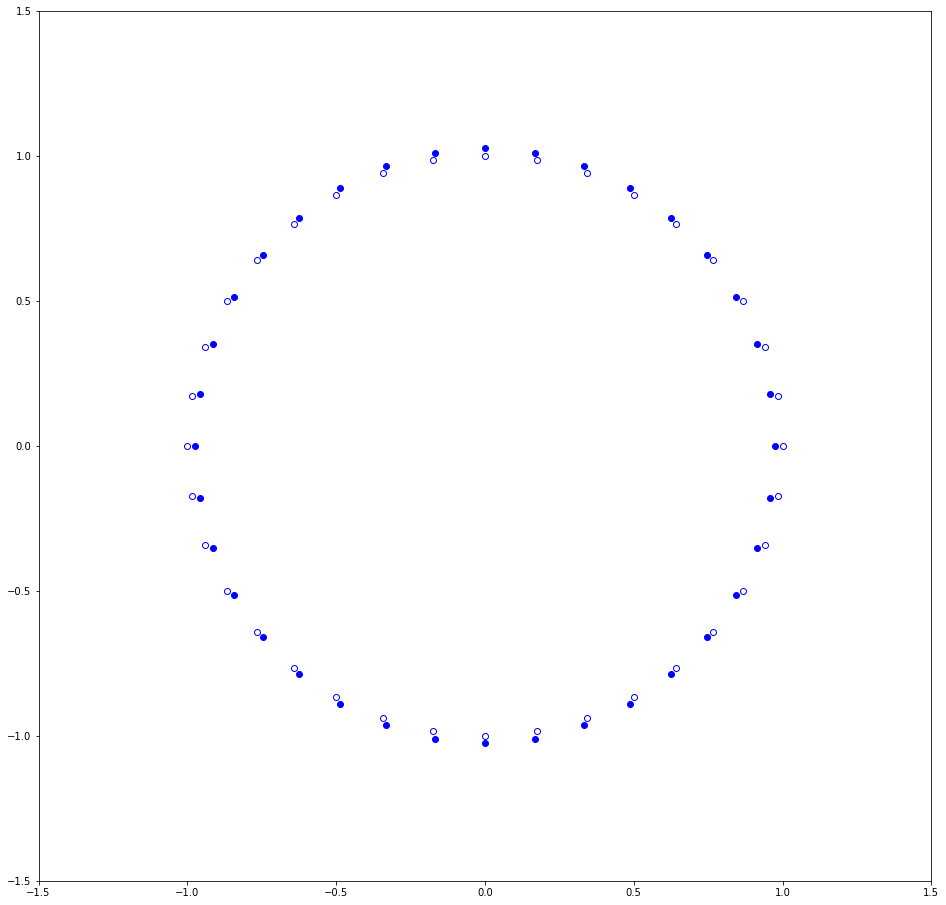

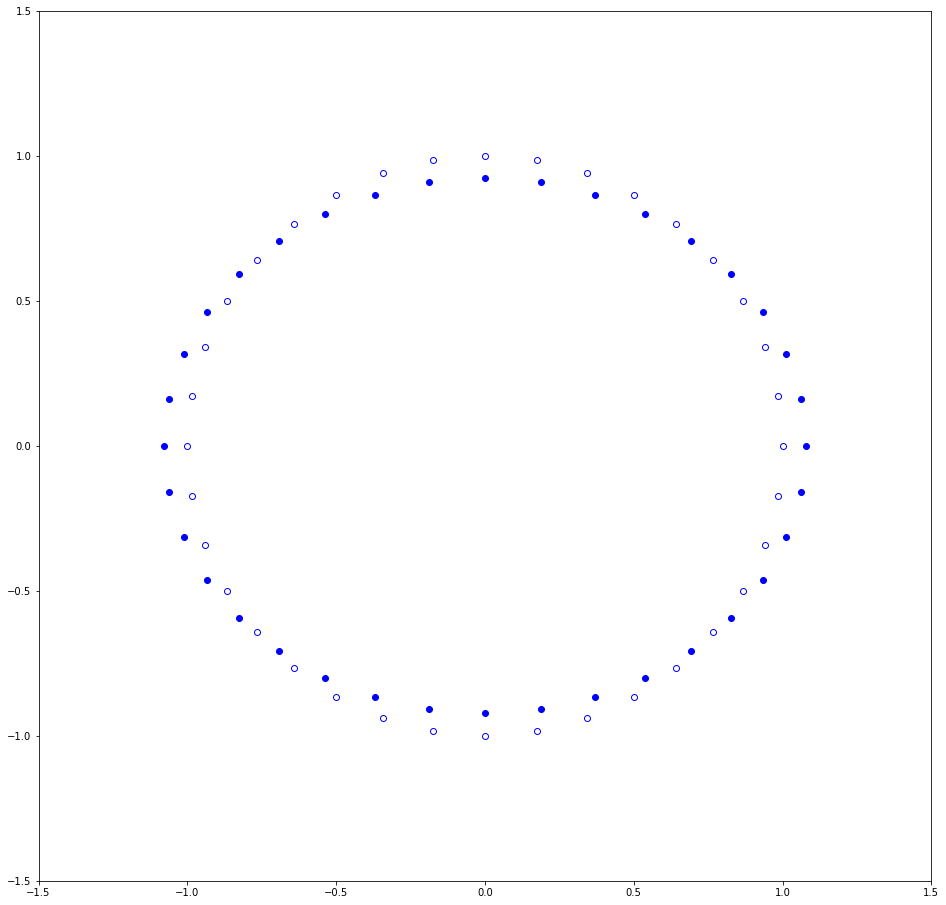

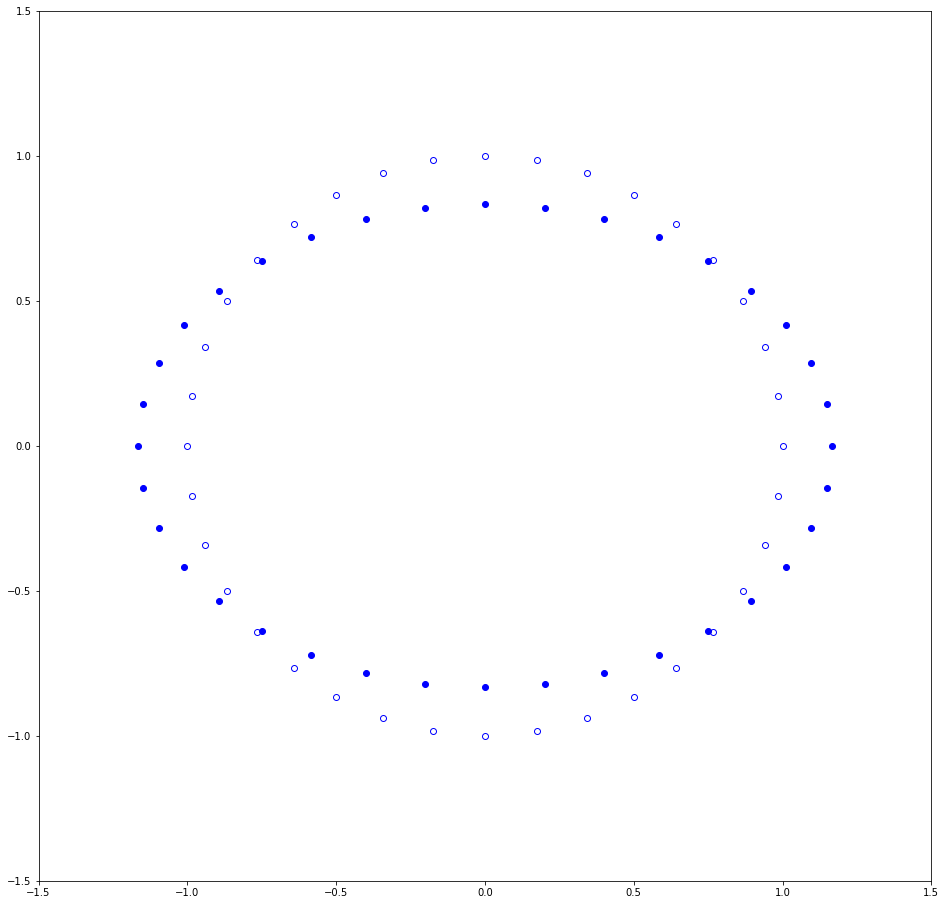

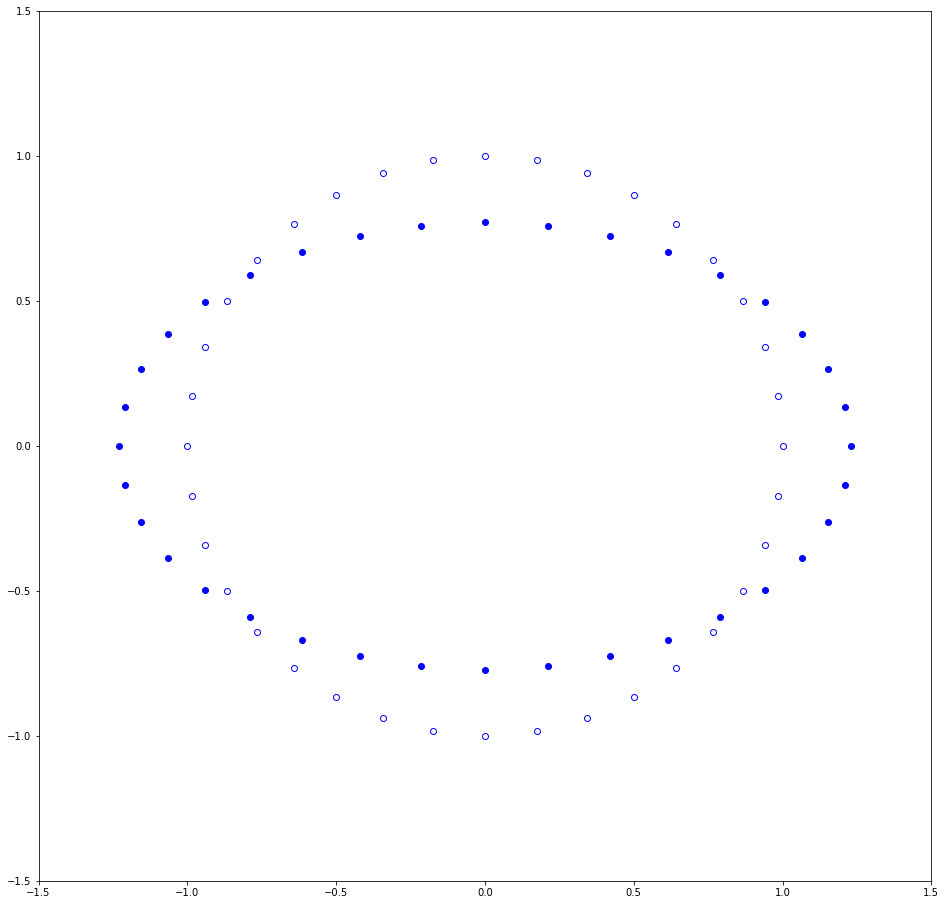

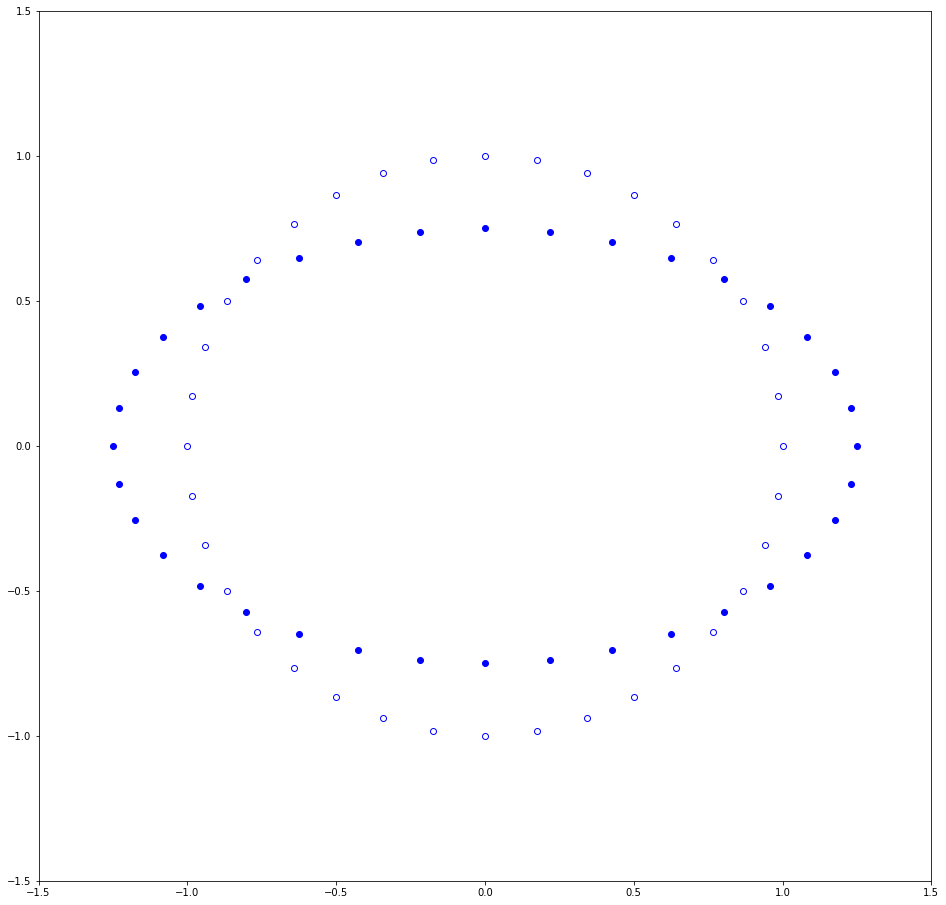

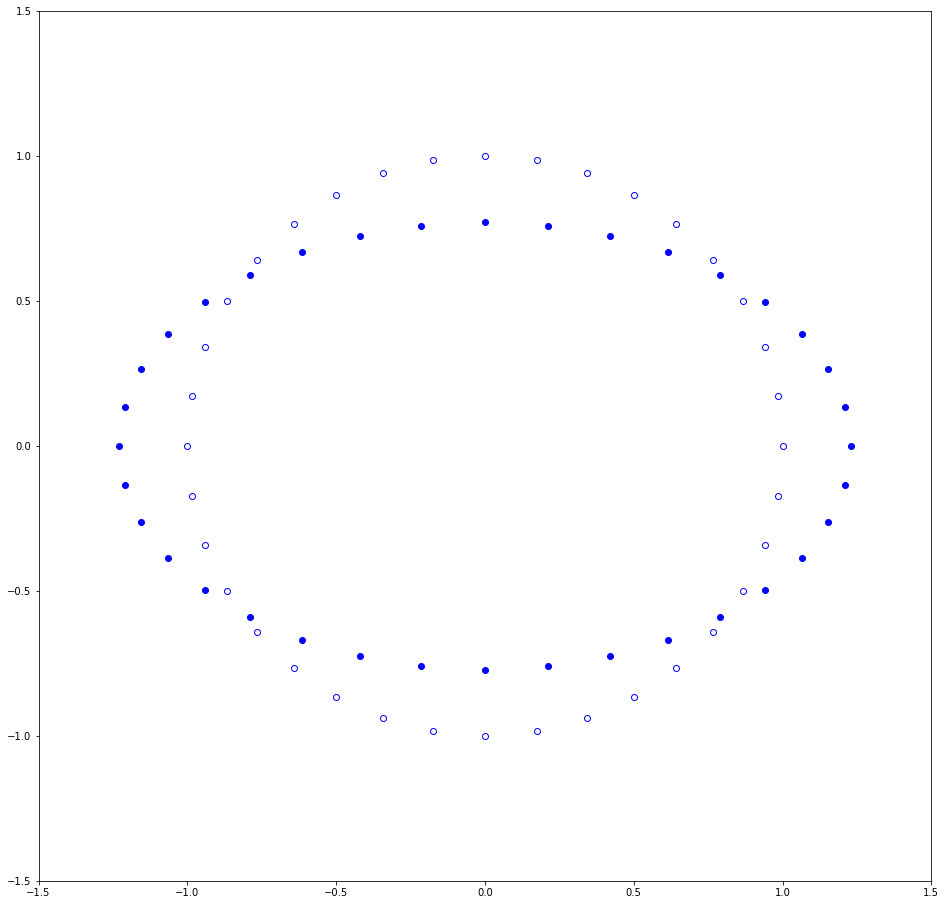

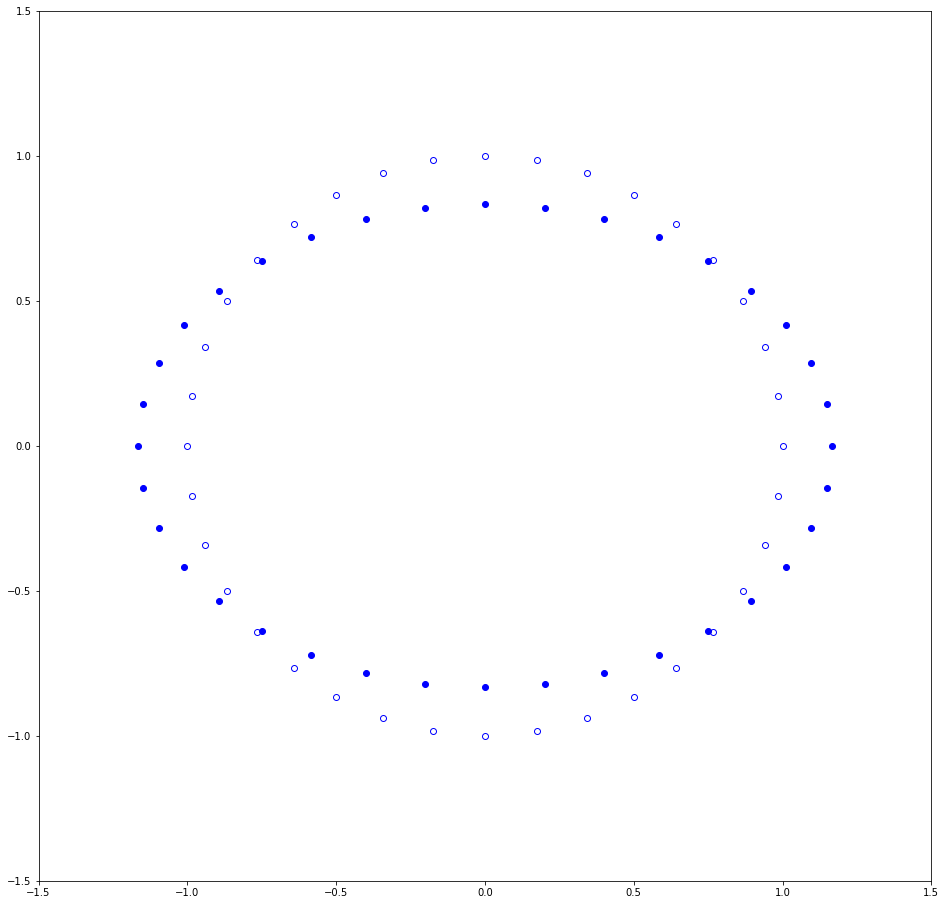

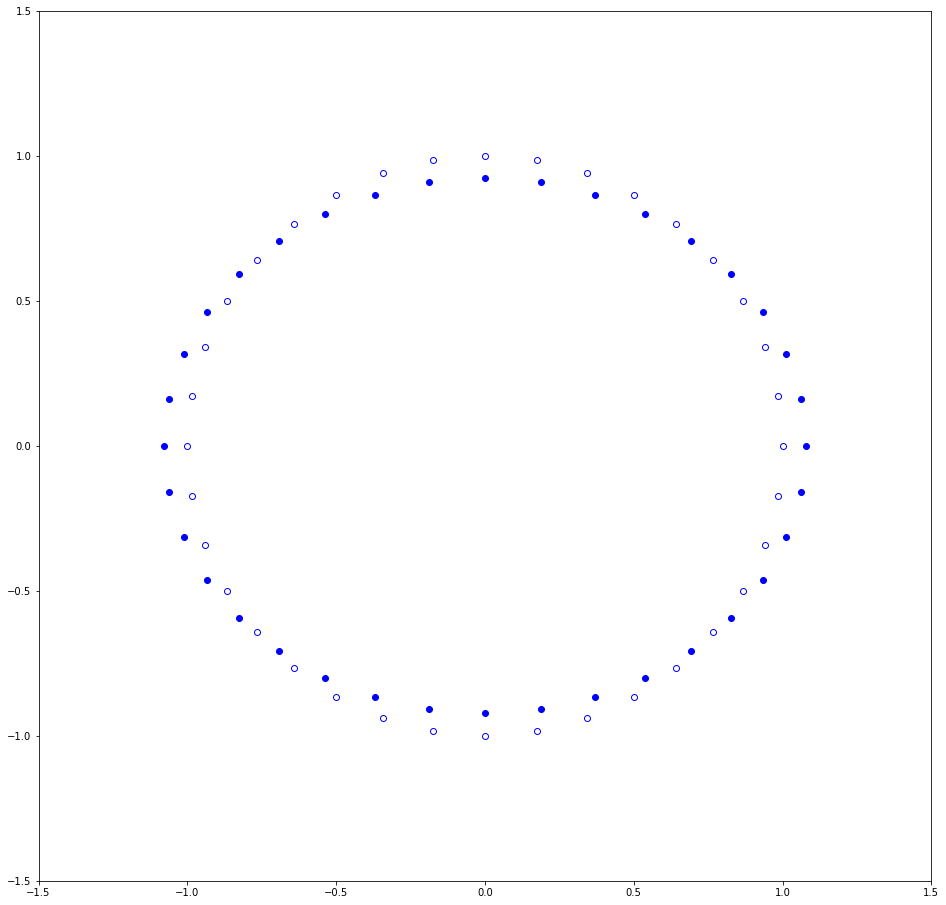

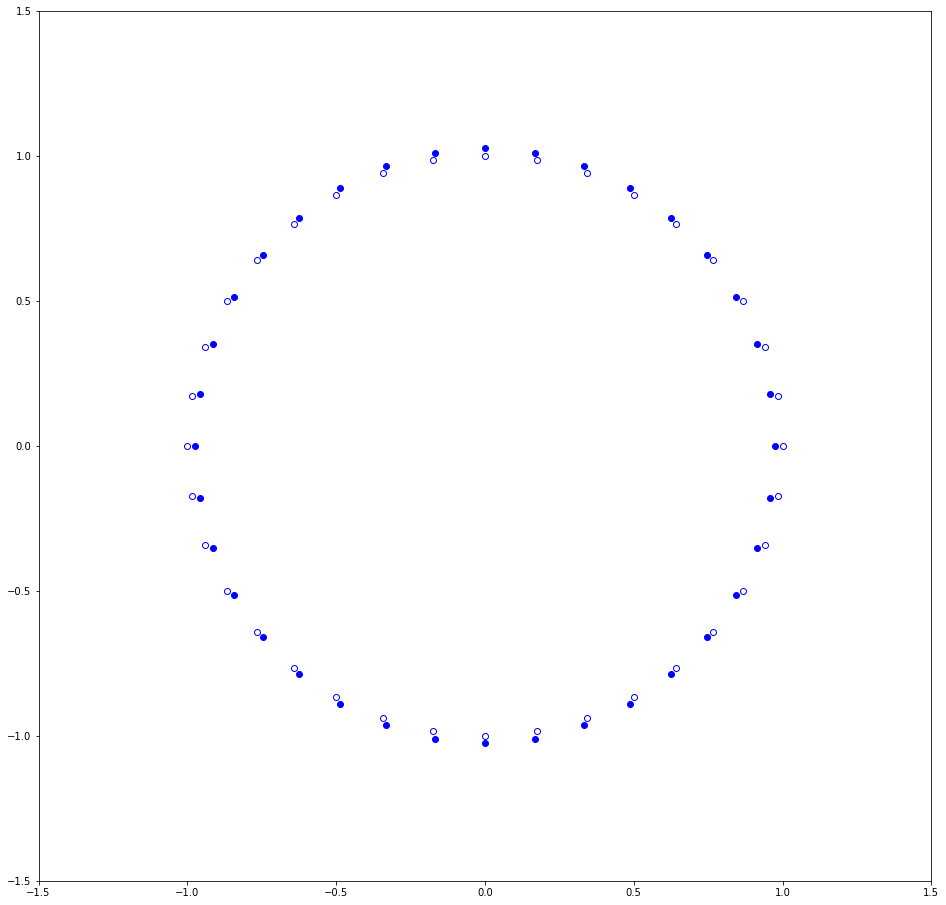

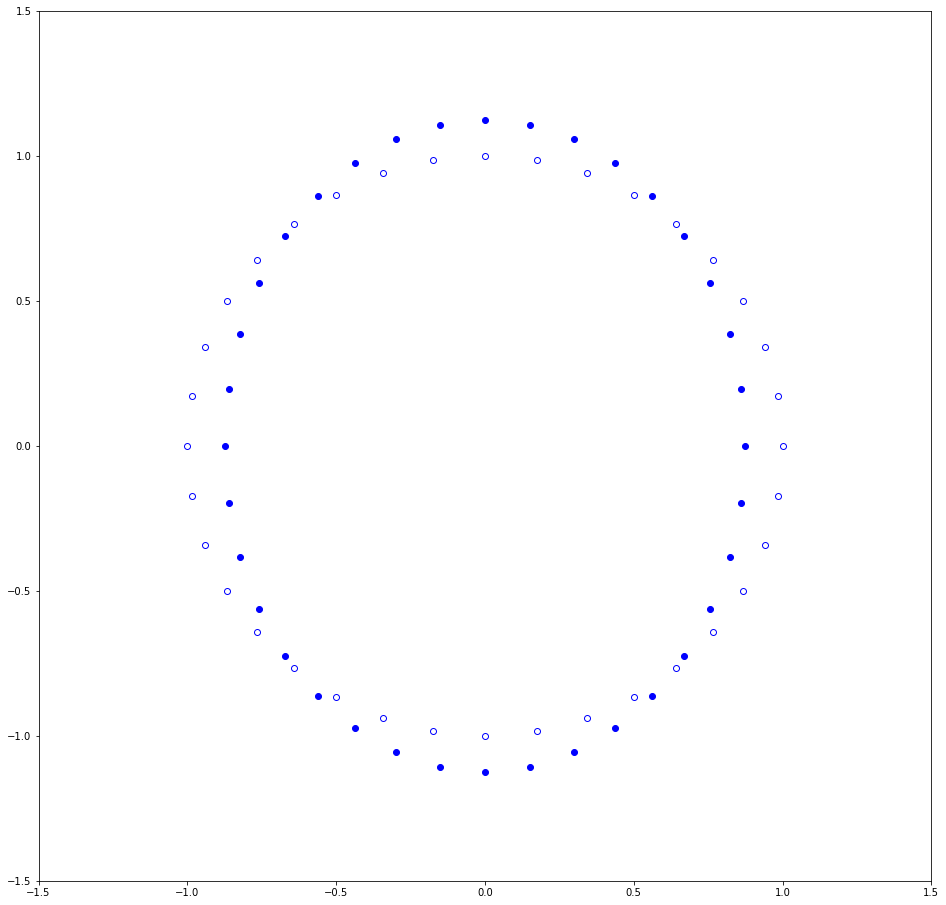

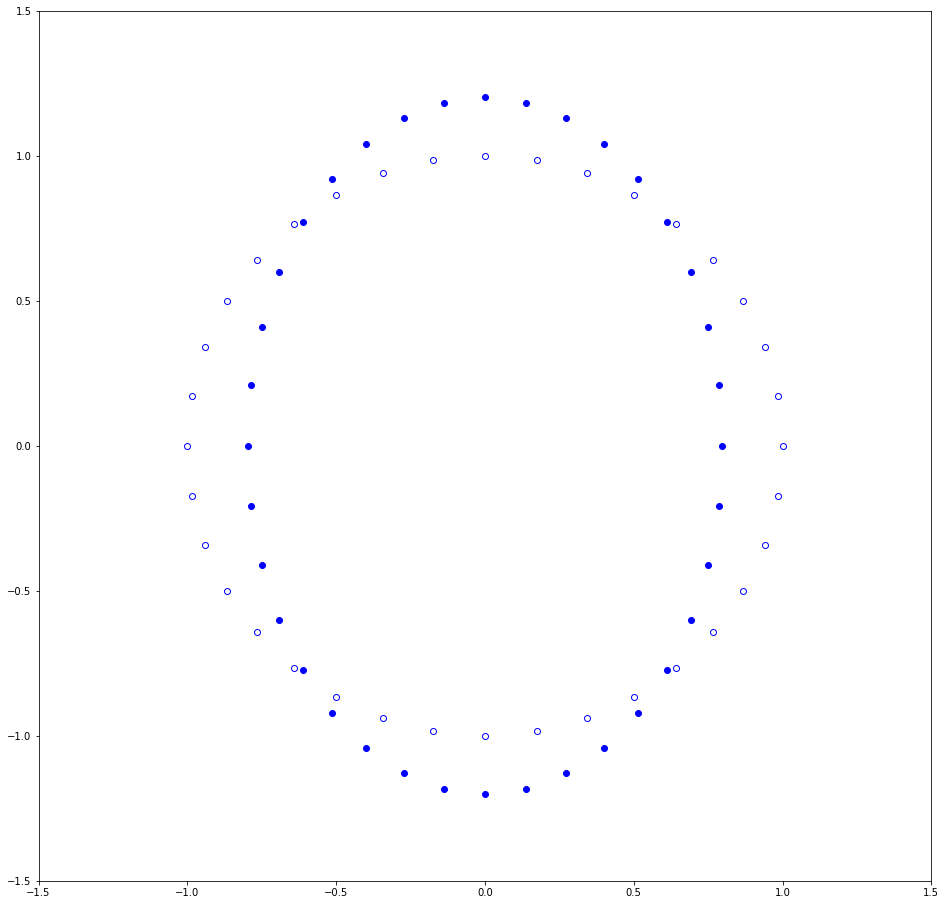

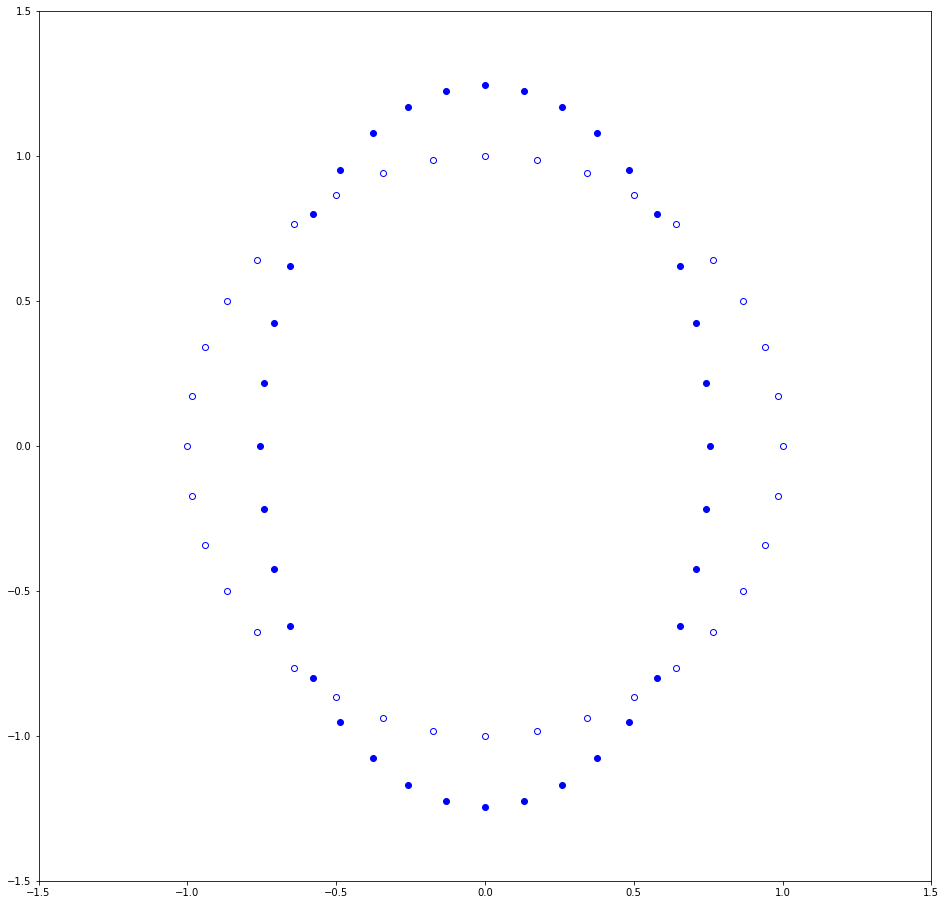

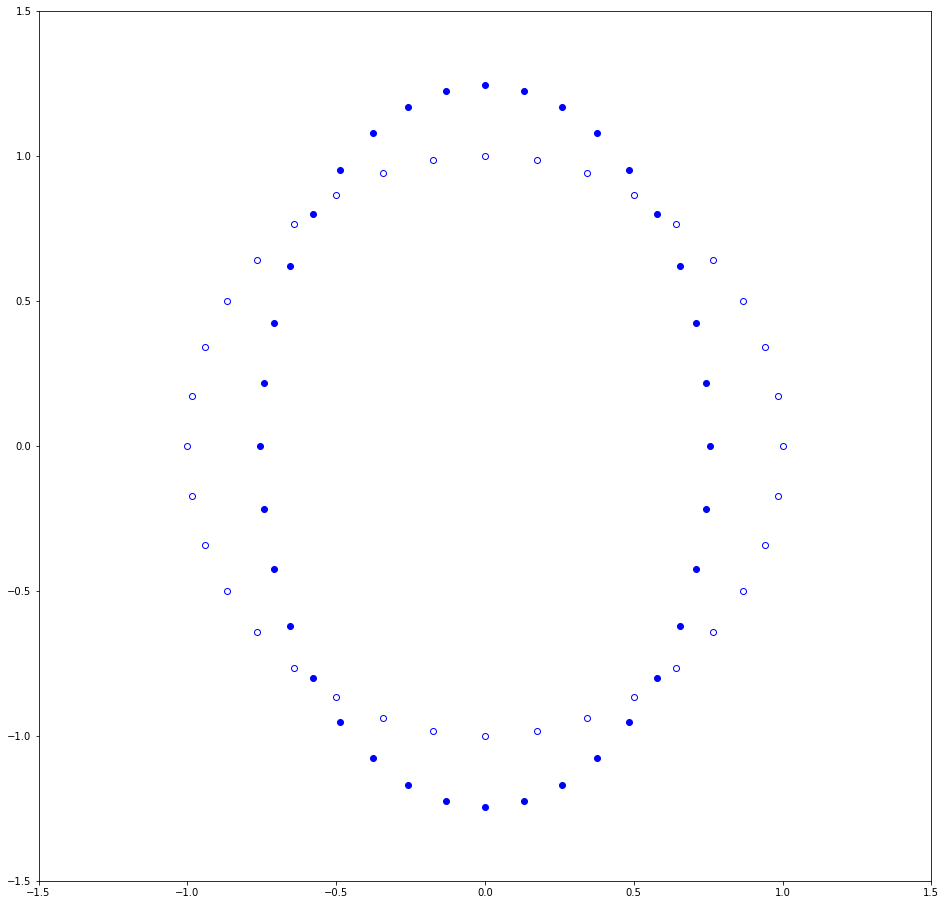

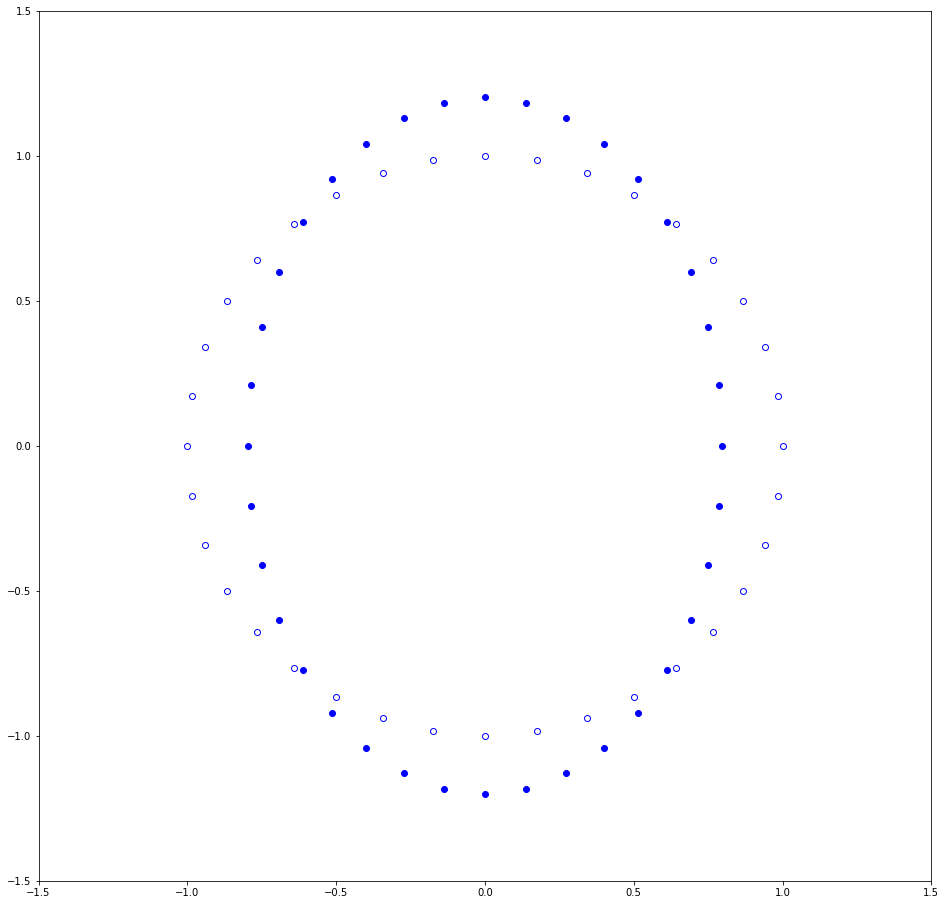

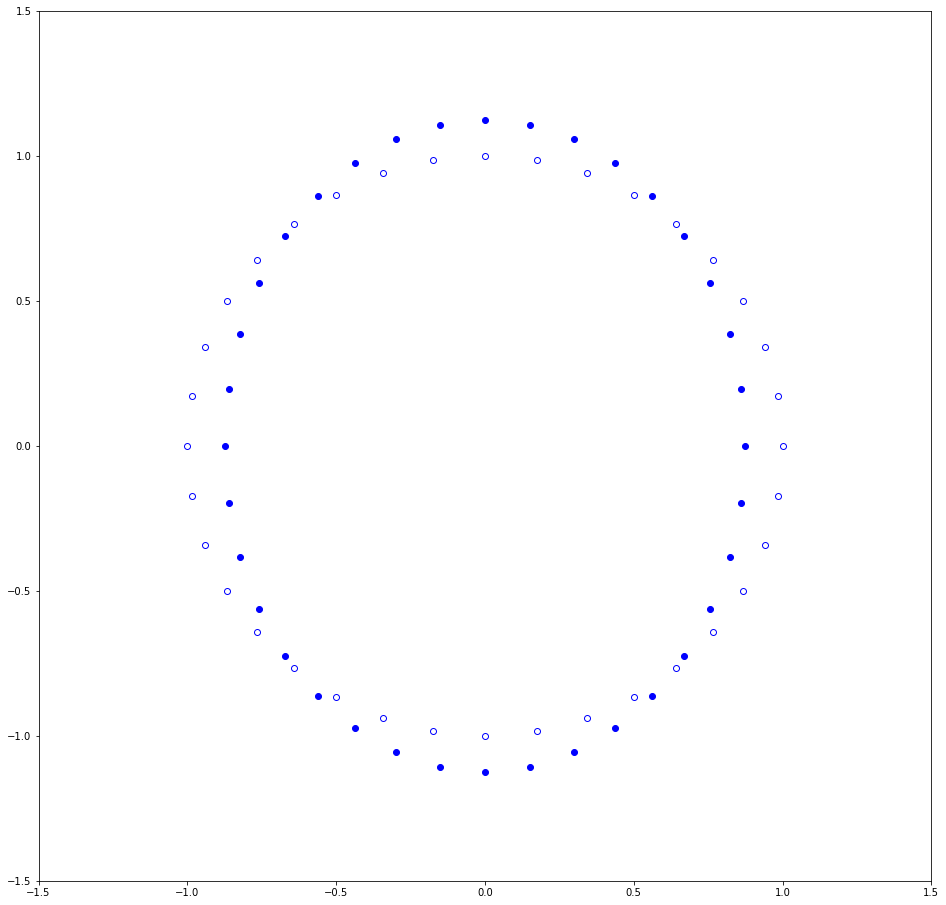

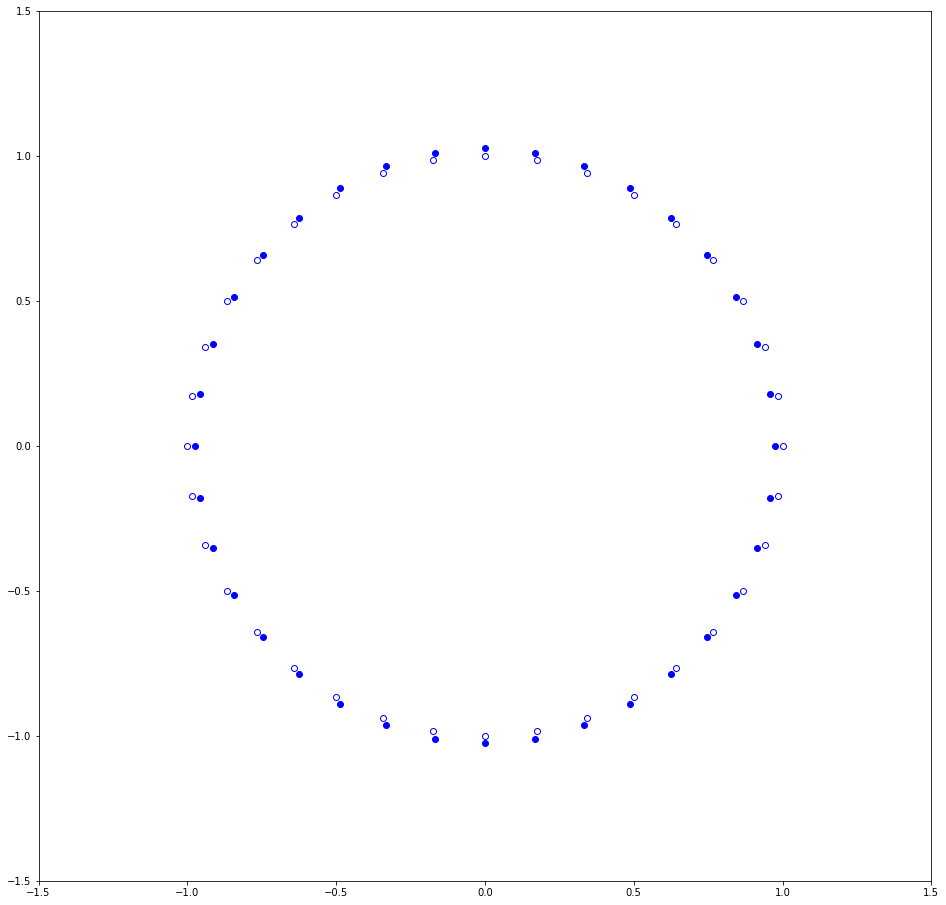

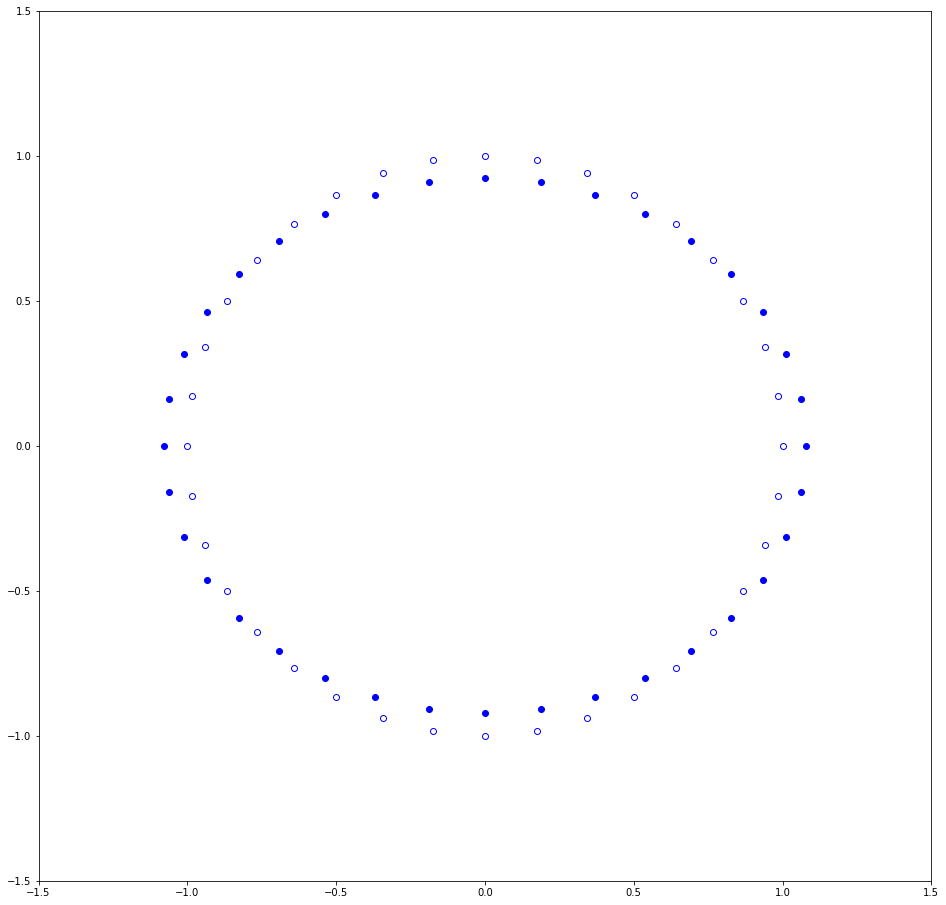

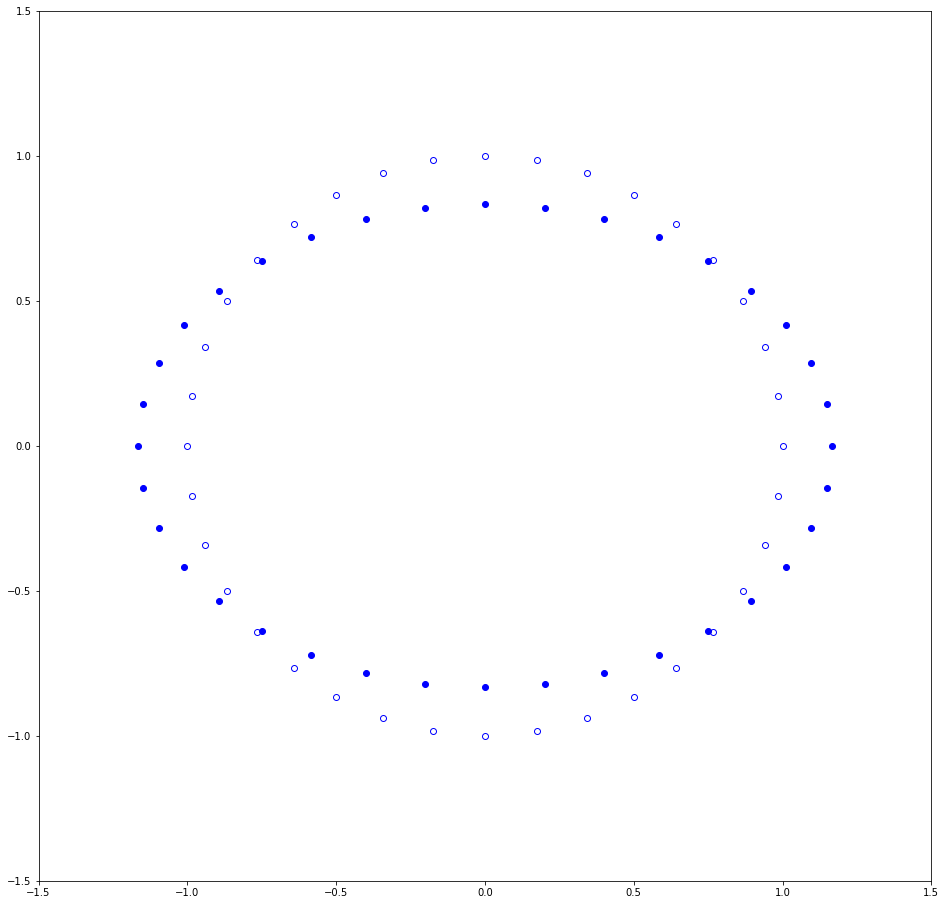

In [3]:
plus = 0.5
cross = 0.0
phasediff = 0
frequency = 1
duration = 2
fps=30

files = []

for i in range(fps*duration - 1):
    files.append('./Circles/{0}.png'.format(i))
    create_ring(plus, cross, frequency, 1.*duration*i/fps, phasediff=phasediff, filename=files[-1])

create_gif(files, duration/fps, filename='./Circle_{0}plus_{1}cross_{2:.2f}phasediff.gif'.format(plus, cross, phasediff))